In [1]:
%load_ext autoreload
%autoreload 2
import multiprocessing
multiprocessing.set_start_method("spawn")


In [ ]:
import os
import re
import fnmatch

def extract_circuit(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Extract circuit from the last few lines
    circuit_line = next((line for line in reversed(lines) if line.startswith("Circuit:")), None)
    
    if circuit_line:
        circuit_str = re.search(r'\[(.*?)\]', circuit_line)
        if circuit_str:
            circuit = list(map(int, circuit_str.group(1).split(', ')))
            return set(circuit)  
    return set()

def main(operation="sin"):
    log_dir = "logs"
    circuits = {}
    for seed in range(1, 11):  
        base_filename = f"IterativePatching_{operation}_{seed}_200_117_[]_100_*.txt"
        file_list = fnmatch.filter(os.listdir(log_dir), base_filename)
        if file_list:
            file_path = os.path.join(log_dir, sorted(file_list)[-1])  # Pick latest file
            circuits[seed] = extract_circuit(file_path)
    for key, value in circuits.items():
        print(key, len(value), end="\t")
    
    common_elements = set.intersection(*circuits.values()) if circuits else set()
    
    full_range = set(range(0, 117))  
    complement = full_range - common_elements

    print("\nCommon elements across all:", len(sorted(common_elements)), sorted(common_elements))
    print("Complement (elements not in all):", len(complement), sorted(complement))
    return circuits

cos = main("cos")
tan = main("tan")


1 71	2 66	3 80	4 66	5 70	6 78	7 86	8 88	9 76	10 64	
Common elements across all: 21 [0, 4, 9, 12, 13, 16, 27, 33, 34, 45, 47, 50, 51, 70, 89, 99, 105, 108, 111, 112, 113]
Complement (elements not in all): 96 [1, 2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 106, 107, 109, 110, 114, 115, 116]
1 91	2 104	3 71	4 104	5 80	6 73	7 97	8 72	9 102	10 106	
Common elements across all: 32 [0, 3, 8, 9, 12, 13, 16, 34, 47, 49, 50, 55, 66, 67, 69, 70, 73, 81, 82, 85, 87, 89, 90, 99, 100, 104, 106, 108, 110, 111, 112, 116]
Complement (elements not in all): 85 [1, 2, 4, 5, 6, 7, 10, 11, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,

In [3]:
sin_circuit = [0, 9, 12, 13, 16, 18, 20, 21, 27, 28, 30, 33, 34, 35, 36, 43, 45, 46, 47, 48, 50, 53, 64, 66, 67, 68, 69, 70, 71, 73, 78, 82, 83, 85, 86, 88, 99, 101, 102, 104, 105, 107, 108, 110, 112, 113, 116]
sin_circuit_model_compliment = [1, 2, 5, 6, 7, 10, 14, 19, 20, 21, 22, 23, 24, 25, 26, 29, 31, 36, 40, 41, 43, 44, 51, 52, 56, 58, 60, 61, 64, 65, 67, 71, 72, 73, 74, 75, 77, 79, 80, 81, 84, 86, 87, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 103, 105, 106, 109, 116]
full_range=set(range(0,117))
sin_circuit_model = sorted(full_range - set(sin_circuit_model_compliment))

cos_circuit = list(cos.values())[-1]
tan_circuit = list(tan.values())[2]

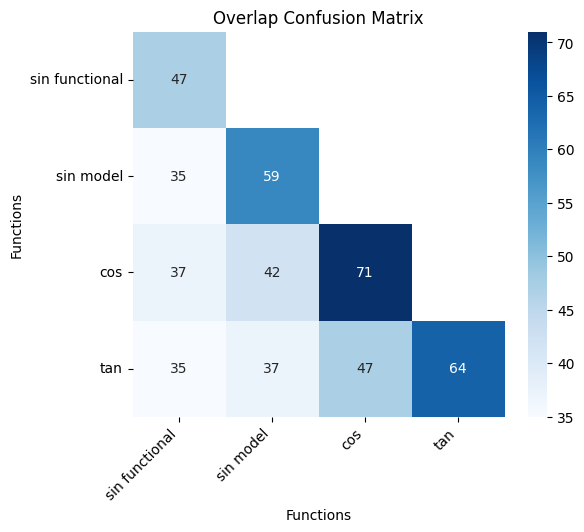

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def overlap_confusion_matrix(lists):
    n = len(lists)
    matrix = np.zeros((n, n), dtype=int)

    for i in range(n):
        for j in range(n):
            matrix[i, j] = len(set(lists[i]) & set(lists[j]))

    return matrix

def plot_confusion_matrix(matrix, labels):
    mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)

    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", cbar=True, mask=mask)

    plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45, ha="right")
    plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=0)

    plt.xlabel("Functions")
    plt.ylabel("Functions")
    plt.title("Overlap Confusion Matrix")
    plt.show()

labels = ["sin functional", "sin model", "cos", "tan"]

conf_matrix = overlap_confusion_matrix([sin_circuit, sin_circuit_model, tan_circuit, cos_circuit])
plot_confusion_matrix(conf_matrix, labels)

In [ ]:
def overlap_confusion_matrix(lists):
    n = len(lists)
    matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            intersection = set(lists[i]) & set(lists[j])
            if i == j:
                matrix[i, j] = len(intersection)  
            else:
                matrix[i, j] = 100 * len(intersection) / max(len(lists[i]), len(lists[j]))

    return matrix


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects

def plot_overlap_confusion_matrix(matrix, labels,
                                  title="Overlap Confusion Matrix",
                                  save_fig=True,
                                  cmap="Blues",
                                  fontsize_main=20,
                                  fontsize_small=18,
                                  figsize=(12, 10),
                                  save_path="plot1", 
                                  display_text=True,
                                  threshold=0):
    """
    Plots a confusion-like matrix where:
    - Diagonal shows raw overlap count.
    - Lower triangle shows percentage overlap w.r.t. row.
    - Upper triangle is hidden.
    """
    n = len(matrix)

    # Display matrix: mask upper triangle + diagonal
    display_matrix = matrix.copy()
    display_matrix[np.triu_indices(n)] = np.nan

    fmt_matrix = np.empty_like(matrix, dtype=object)
    for i in range(n):
        for j in range(n):
            if i == j:
                fmt_matrix[i, j] = f"{int(matrix[i, j])}"
            elif i > j:
                if int(matrix[i, j]) >= threshold:
                    fmt_matrix[i, j] = f"{matrix[i, j]:.0f}%"
                else:
                    fmt_matrix[i, j] = ""
            else:
                fmt_matrix[i, j] = ""

    fig, ax = plt.subplots(figsize=figsize)
    heat = sns.heatmap(
        display_matrix,
        annot=False,
        cmap=cmap,
        fmt="",
        cbar=True,
        linewidths=1.5,
        linecolor="white",
        vmin=np.nanmin(display_matrix),
        vmax=np.nanmax(display_matrix),
        ax=ax
    )
    cbar = heat.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize_small)
    cbar.set_label('Overlap Percentage (%)', fontsize=fontsize_main, labelpad=10)

    # Tick labels
    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=fontsize_small)
    ax.set_yticklabels(labels, rotation=0, fontsize=fontsize_small)

    for i in range(n):
        for j in range(n):
            value = fmt_matrix[i, j]
            if value == "":
                continue

            x, y = j + 0.5, i + 0.5
            if i == j:
                ax.add_patch(plt.Rectangle((j+0.01, i+0.01), 0.98, 0.98, fill=True, color='black', lw=0))
                text_color = 'white'
            else:
                text_color = 'white'
            if display_text or i == j:
                ax.text(x, y, value, ha='center', va='center',
                        fontsize=fontsize_small - 7, weight='bold', color=text_color,
                        path_effects=[path_effects.withStroke(linewidth=2.5, foreground='black')])

    ax.set_xlabel("Functions", fontsize=fontsize_main, weight='bold')
    ax.set_ylabel("Functions", fontsize=fontsize_main, weight='bold')
    ax.set_title(title, fontsize=fontsize_main, weight='bold', pad=20)
    ax.tick_params(
    axis='both',        
    which='both',      
    length=7,          
    width=2,           
    direction='out'    
)

    plt.tight_layout()

    if save_fig:
        plt.savefig(f"{save_path}.pdf", format="pdf", bbox_inches="tight")
        plt.savefig(f"{save_path}.png", format="png", bbox_inches="tight")

    plt.show()






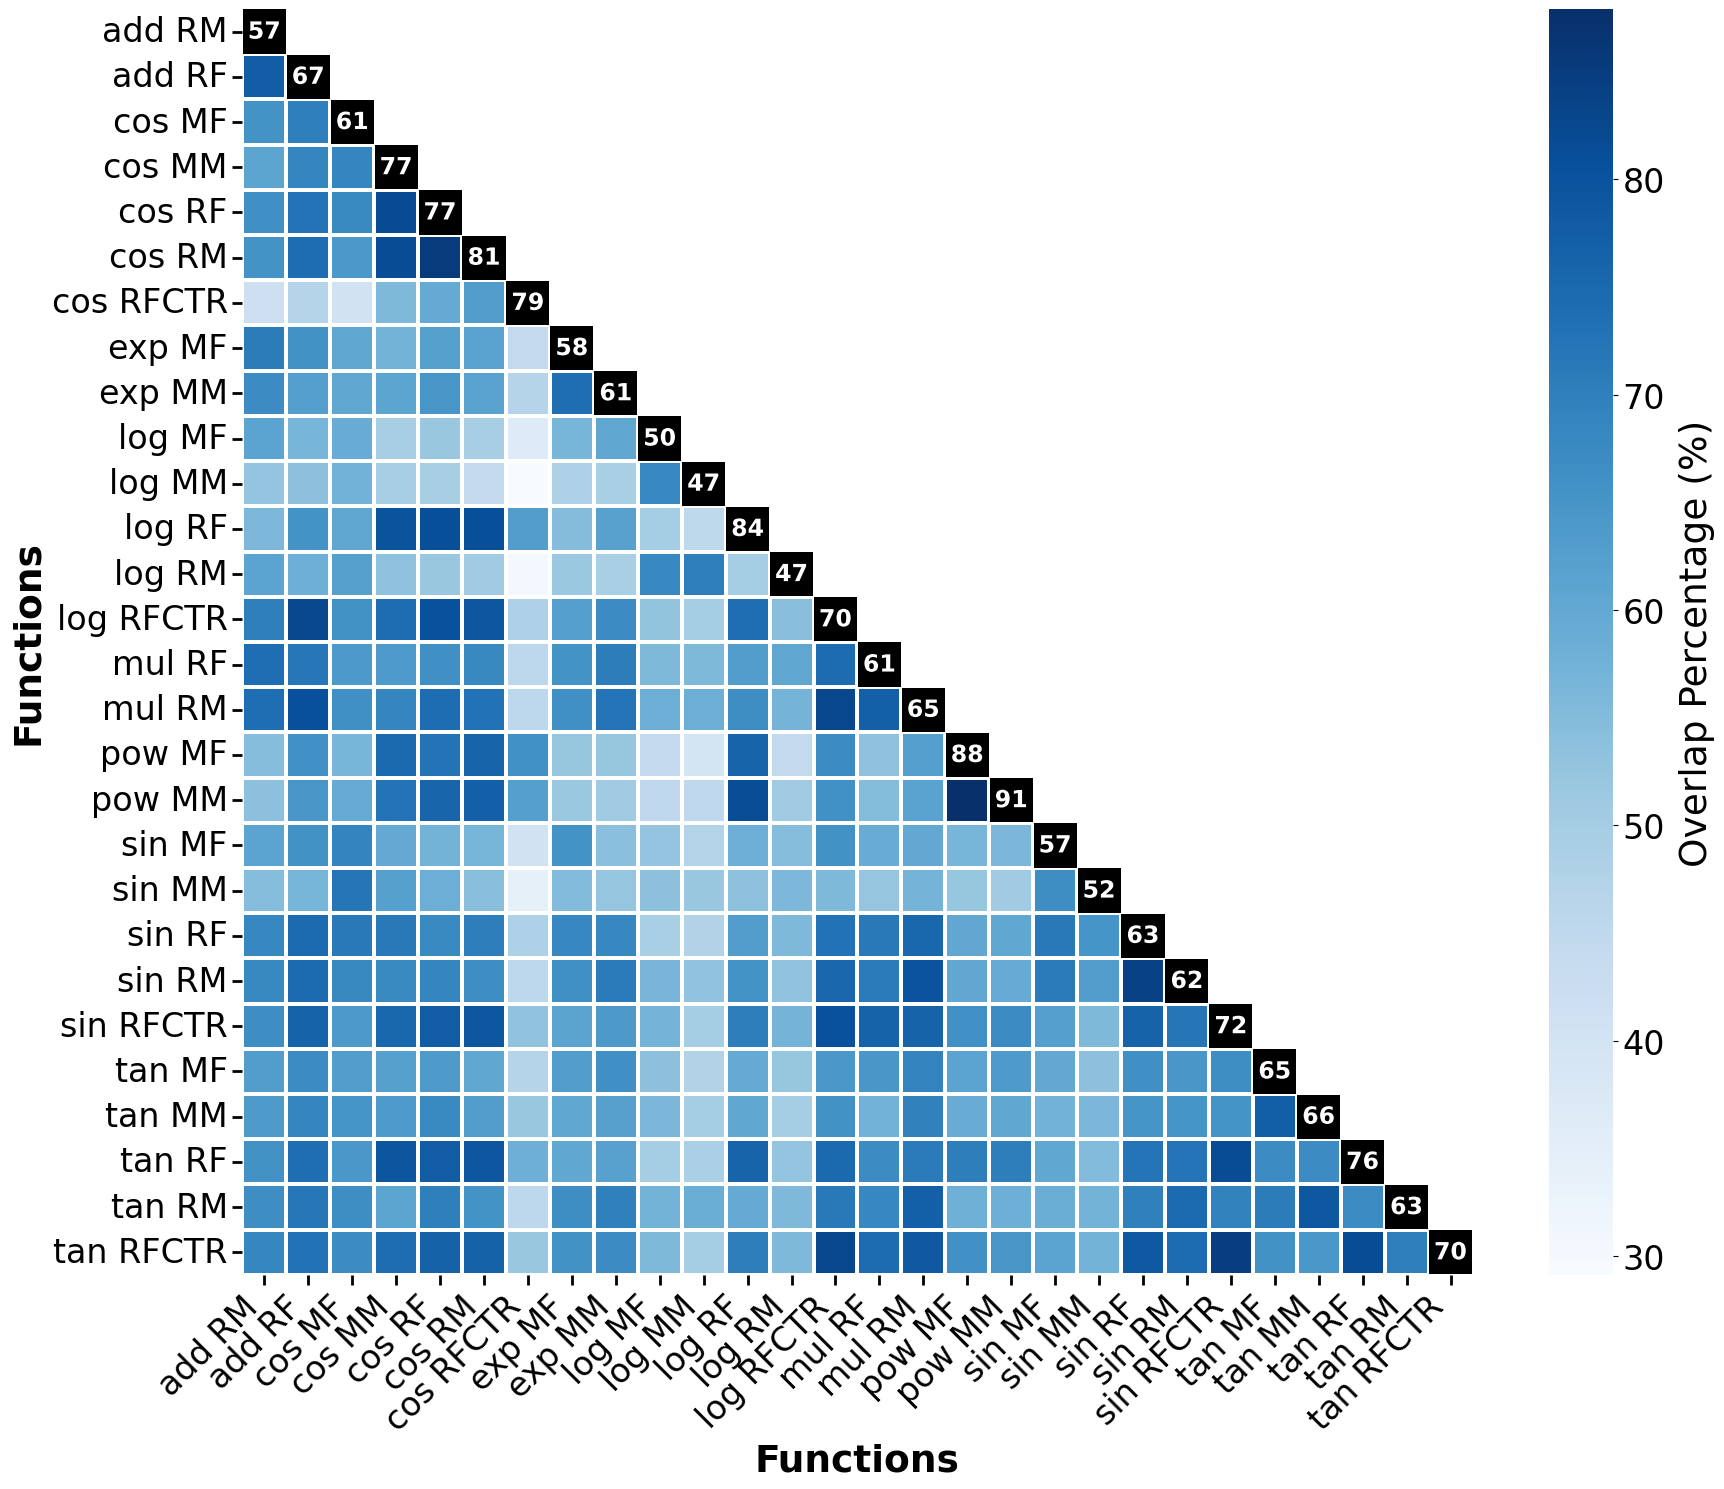

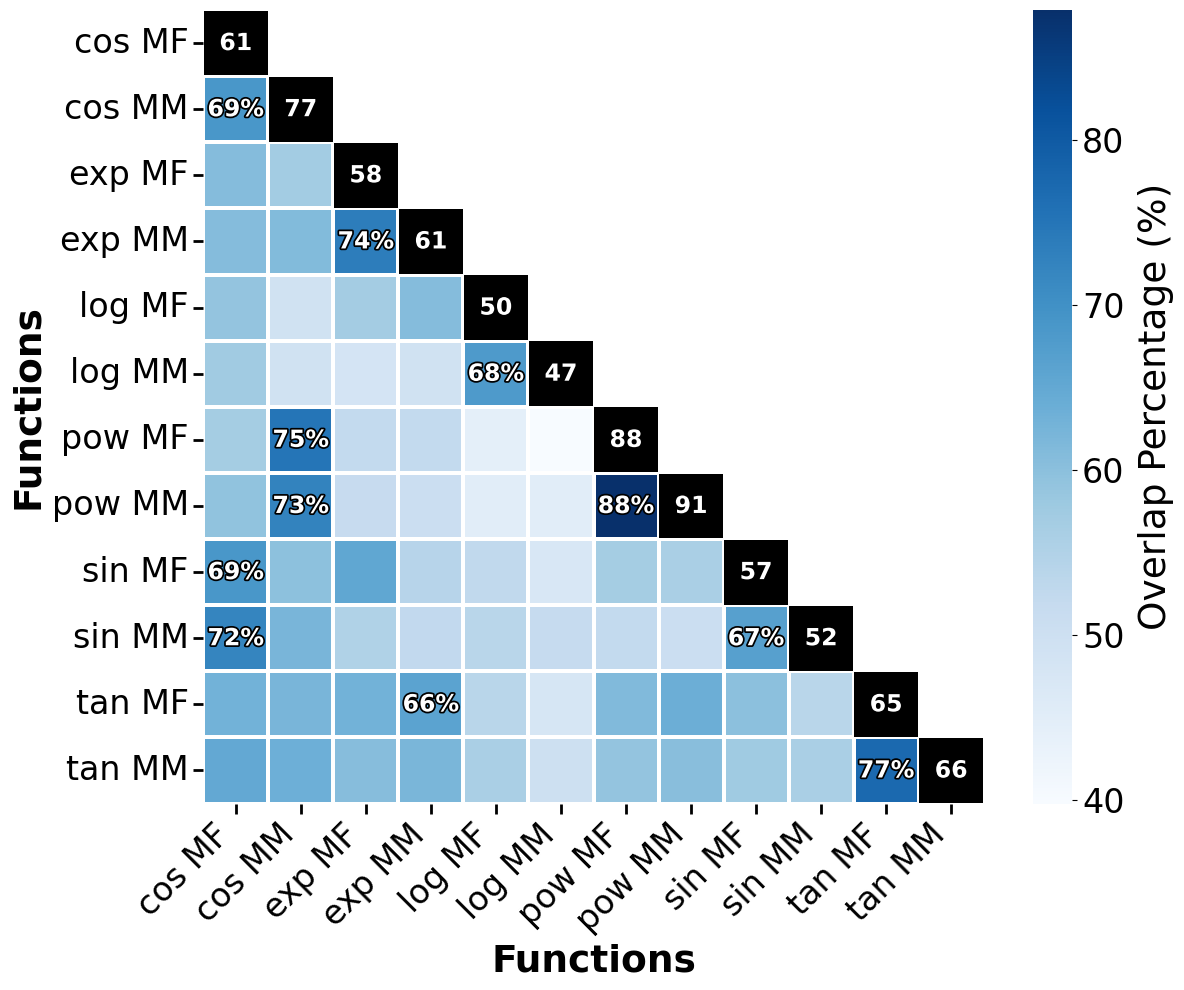

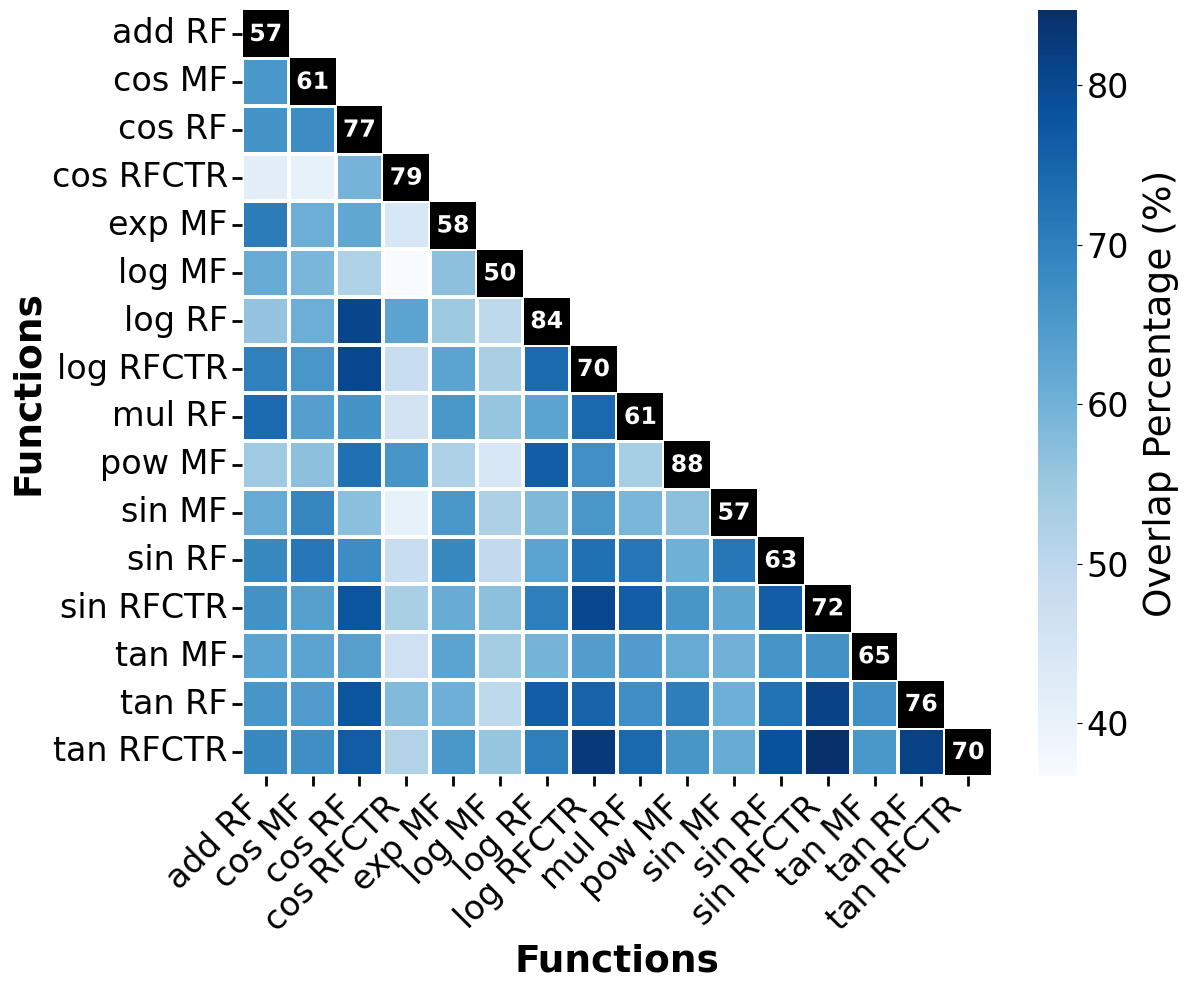

In [ ]:
import json 

with open("circuit_config_2.json") as f:
    configs = json.load(f)
labels = [
    "add RM", "add RF",
    "cos MF", "cos MM", "cos RF", "cos RM", "cos RFCTR",
    "exp MF", "exp MM",
    "log MF", "log MM", "log RF", "log RM", "log RFCTR",
    "mul RF", "mul RM",
    "pow MF", "pow MM",
    "sin MF", "sin MM", "sin RF", "sin RM", "sin RFCTR",
    "tan MF", "tan MM", "tan RF", "tan RM", "tan RFCTR"
]

conf_matrix = overlap_confusion_matrix([config["circuit"] for config in configs])
plot_overlap_confusion_matrix(conf_matrix, labels, 
                              save_fig=True, save_path="pictures/circuitfinding/all",
                              fontsize_main=27,
                              fontsize_small=24,
                              display_text=False,
                              title="",
                              figsize=(18,15))

labels = [
    f"{config['operation']} {config['patch_type'][0].capitalize()}{config['Evaluation_type'][0].capitalize()}"
    for config in configs if config["patch_type"] == "mean"
]

conf_matrix = overlap_confusion_matrix([config["circuit"] for config in configs if config["patch_type"] == "mean"])
plot_overlap_confusion_matrix(conf_matrix, labels, 
                              save_fig=True, save_path="pictures/circuitfinding/MvsFF",
                              fontsize_main=27,
                              fontsize_small=24,
                              title="",
                              threshold=65.9)

labels = [
    f"{config['operation']} {config['patch_type'][0].capitalize()}{config['Evaluation_type'][0].capitalize()}{'CTR' if config['CTR'] == True else ''}"
    for config in configs if config["Evaluation_type"] == "functional"
]

conf_matrix = overlap_confusion_matrix([config["circuit"] for config in configs if config["Evaluation_type"] == "functional"])
plot_overlap_confusion_matrix(conf_matrix, labels, 
                              save_fig=True, save_path="pictures/circuitfinding/MvsRP",
                              fontsize_main=27,
                              fontsize_small=24,
                              title="",
                              threshold=99)

[[11  6  6  1  4  4  8  2  2]
 [25 25 23 21 18 17 19 21 17]
 [28 18 22 26 27 19 17 21 15]
 [22  8  3 15 16  9 13  7 16]
 [27 17 11 18 27 24 15 27 22]
 [13  9 10 13 14  7  5 12  7]
 [24 25 26 23 24 20 25 25 16]
 [13  8  3  4  6 12  5 11  7]
 [22 19 25 21 21 23 21 22 26]
 [11 17  8 10  4  4  8 12  8]
 [21 20 25 17 27 23 19 25 25]
 [12 13 14 10  6 13  8  2  5]
 [20 27 23 23 27 23 24 21 25]]
(13, 9)


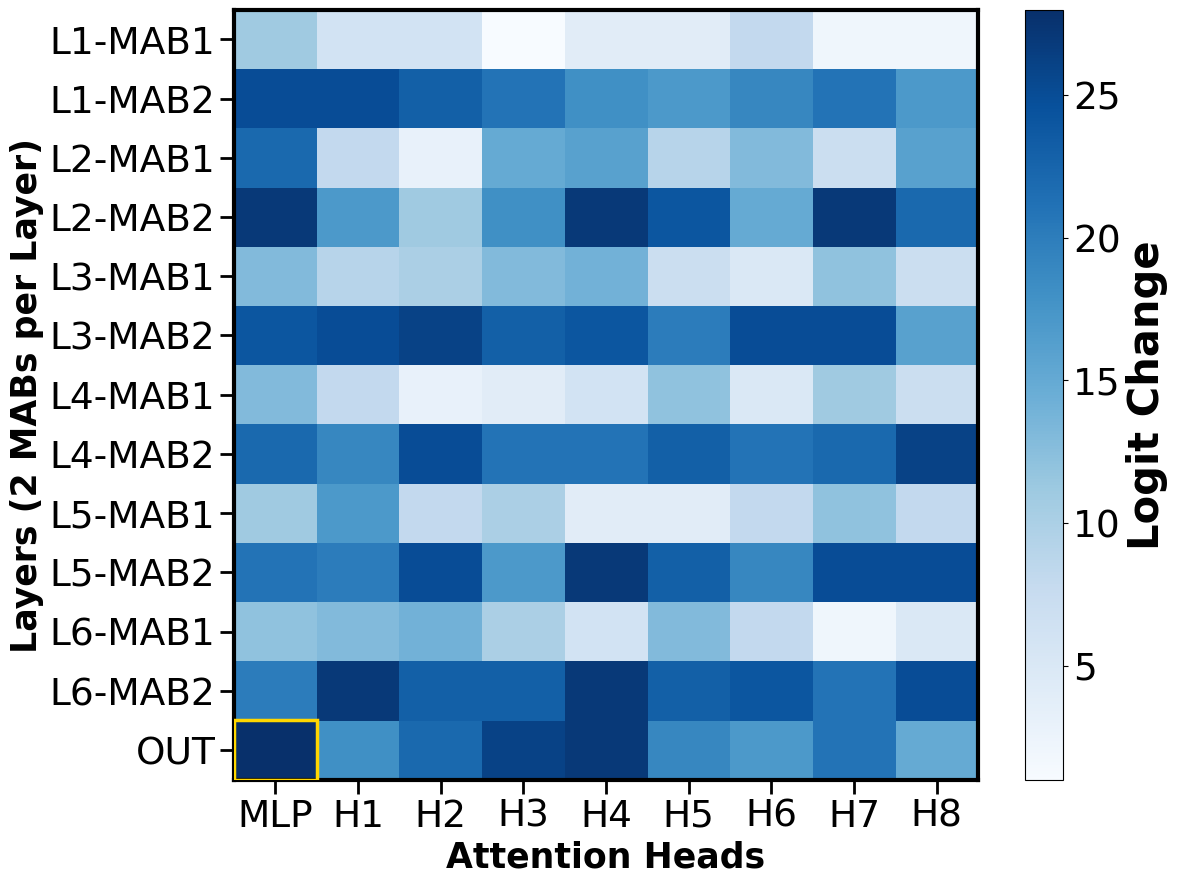

In [ ]:
import numpy as np

total = [config["circuit"] for config in configs]

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

flat_total = [item for total in total for item in total]

all_possible = list(range(117))  # 0 to 117
counter = Counter(flat_total)
full_count = [counter.get(i, 0) for i in all_possible]  # fill missing with 0

count_matrix = np.array(full_count).reshape((13, 9))
print(count_matrix)
print(count_matrix.shape)

bliep = count_matrix[2, :]
count_matrix = np.delete(count_matrix, 2, axis=0)
count_matrix = np.vstack((count_matrix, bliep))

from vis_utils import importance_map

importance_map(data=count_matrix, threshold=1, title="",
               save_fig=True, show_threshold=False,
               save_path="pictures/circuitfinding/usageofcomponentsinallcircuits")

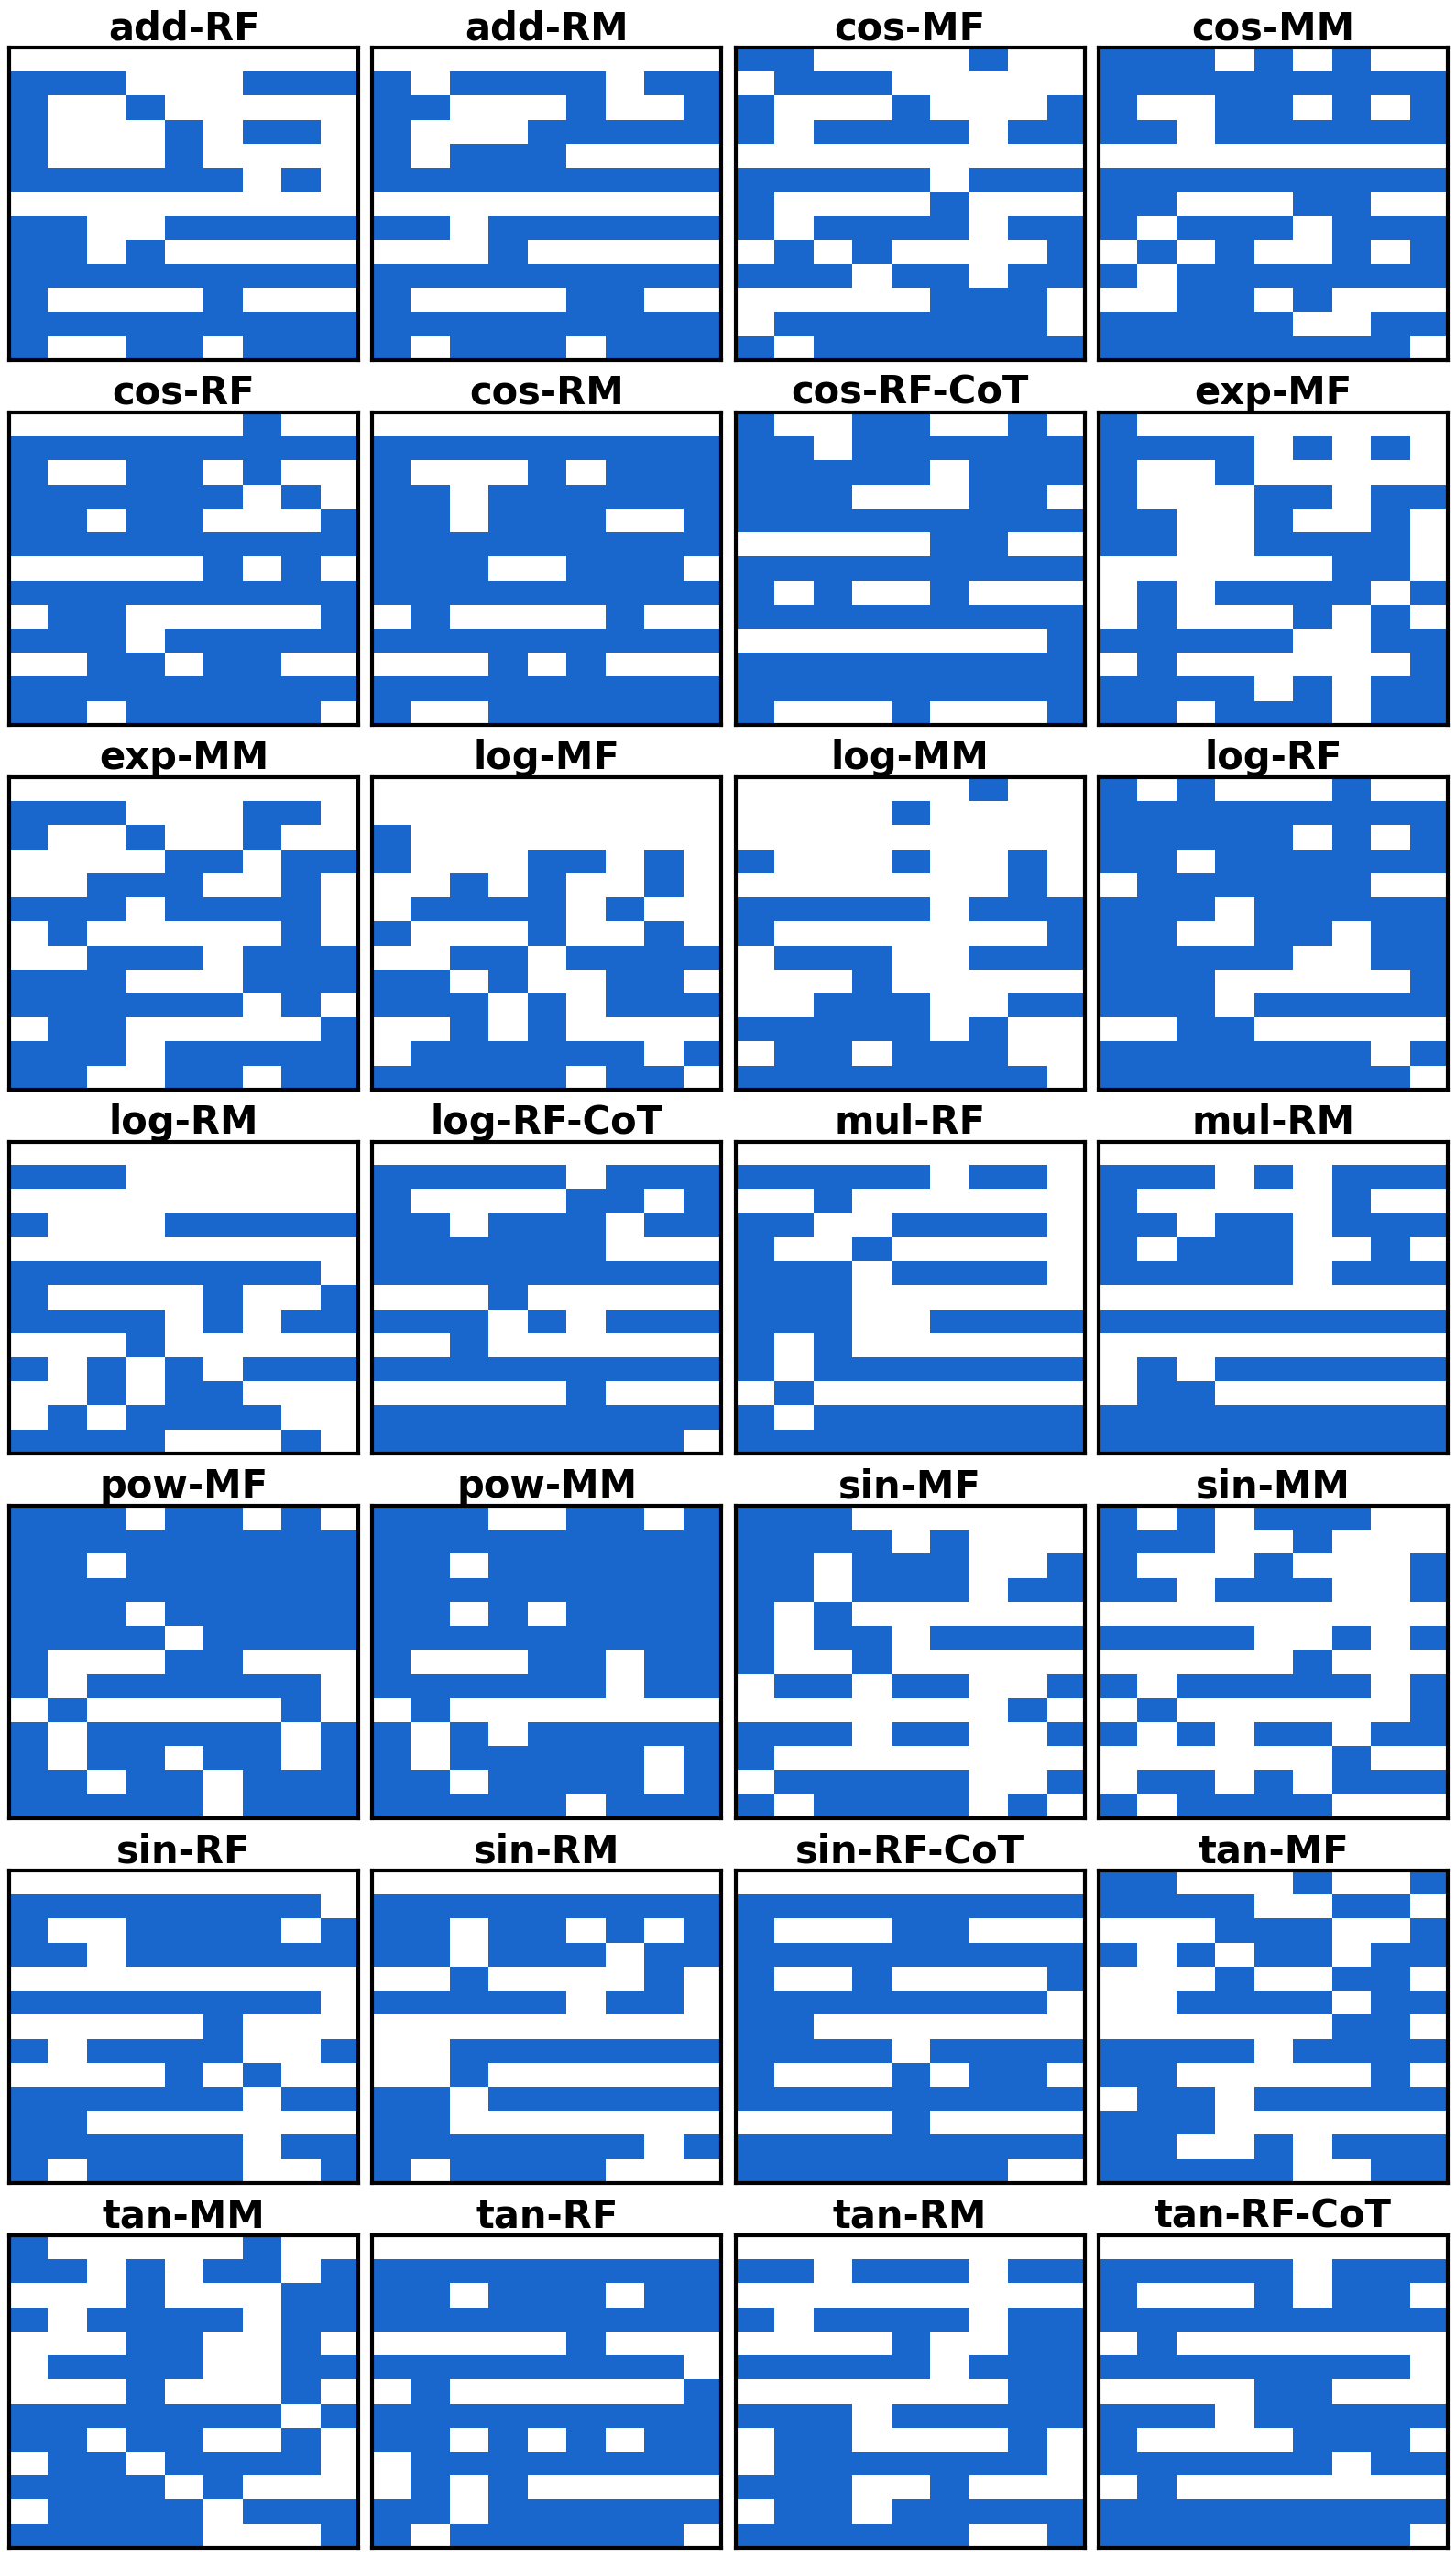

In [ ]:
from vis_utils import importance_mapall
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 28))
axes = axes.flatten()

for i, (config, ax) in enumerate(zip(configs, axes)):
    circuit = config["circuit"]
    name = f'{config["operation"]}-{config["patch_type"].capitalize()[0]}{config["Evaluation_type"].capitalize()[0]}'
    if config["CTR"]:
        name += "-CoT"

    counter = Counter(circuit)
    full_count = [counter.get(j, 0) for j in all_possible]
    count_matrix = np.array(full_count).reshape((13, 9))

    bliep = count_matrix[2, :]
    count_matrix = np.delete(count_matrix, 2, axis=0)
    count_matrix = np.vstack((count_matrix, bliep))

    importance_mapall(
        data=count_matrix,
        threshold=20,
        title=name,
        save_fig=False,
        show_threshold=False,
        show_border=False,
        color_way=False,
        ax=ax,
        individual=True,
    )

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")

for j in range(len(configs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("pictures/circuitfinding/all_configs_grid.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

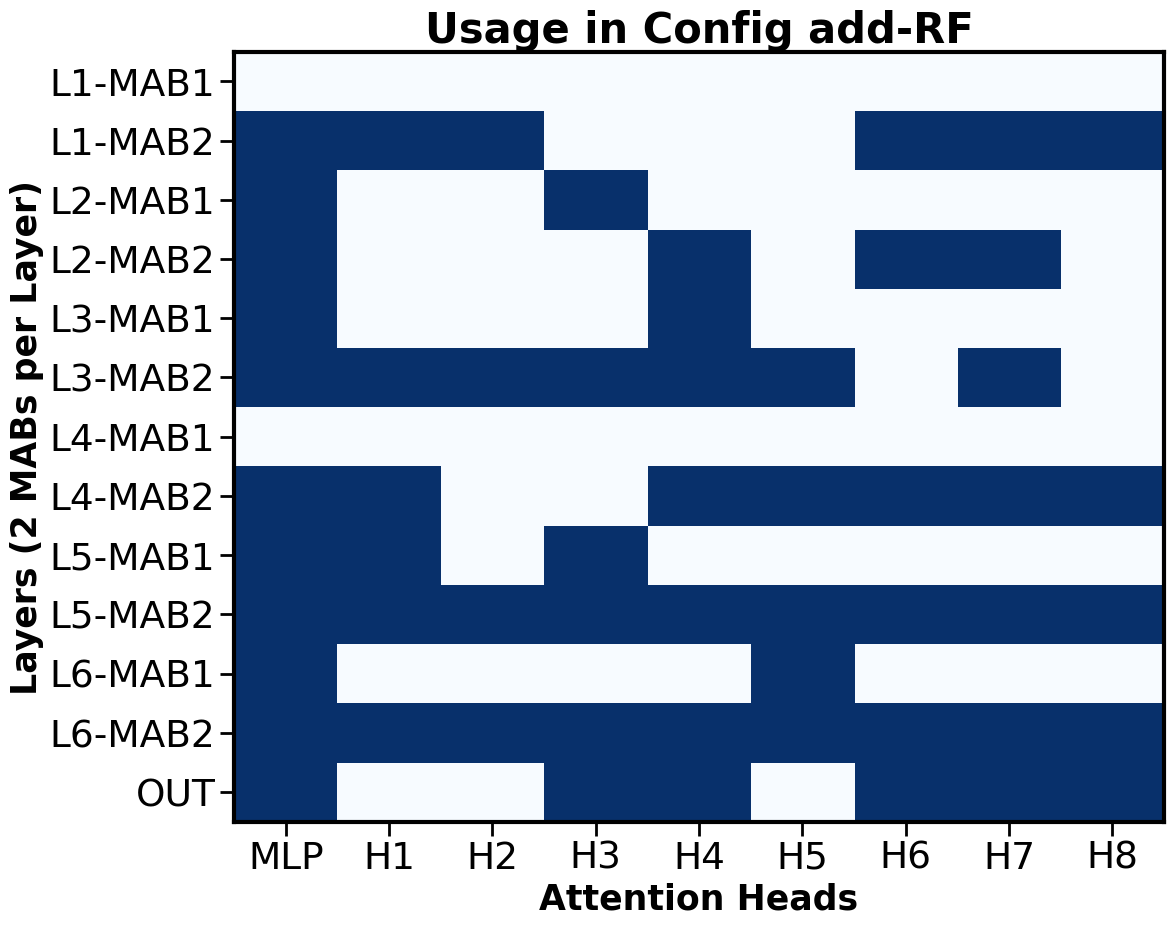

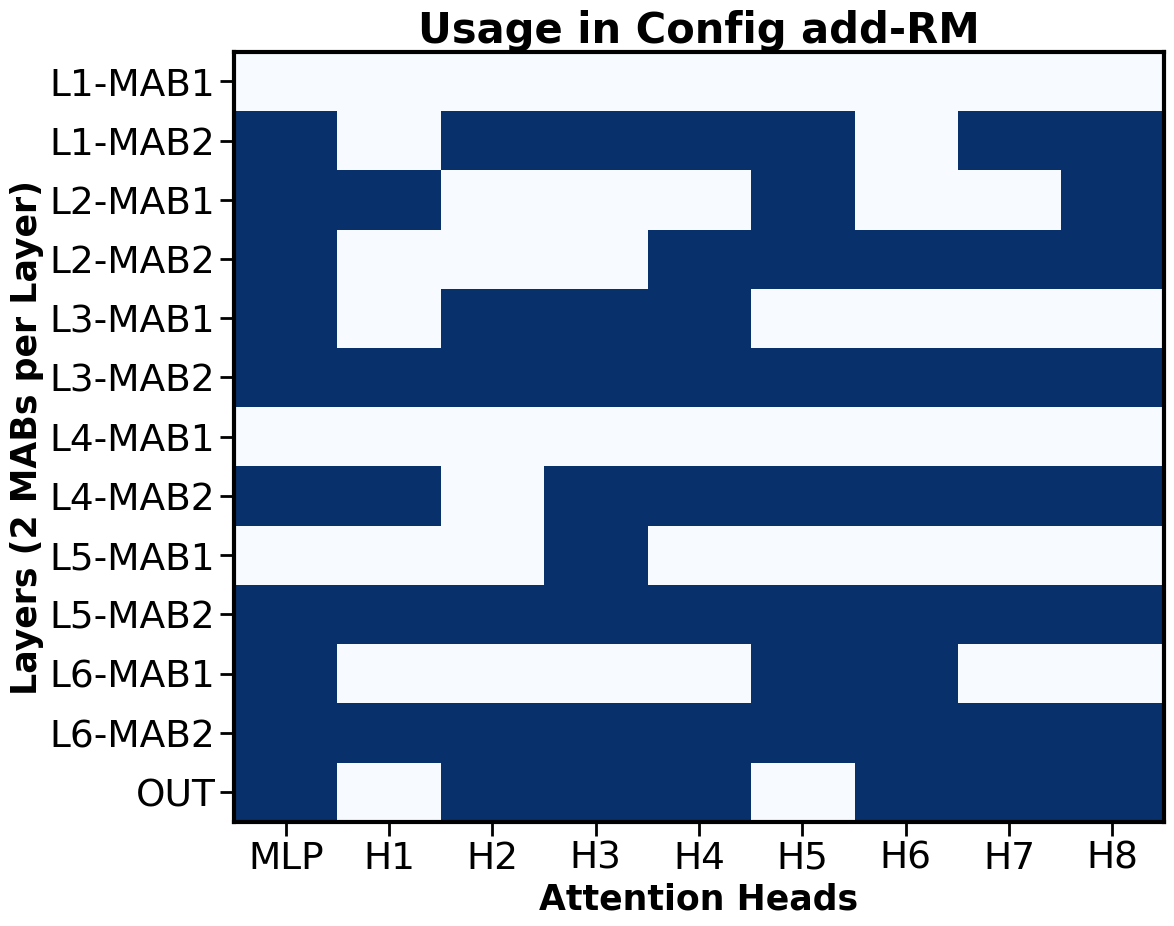

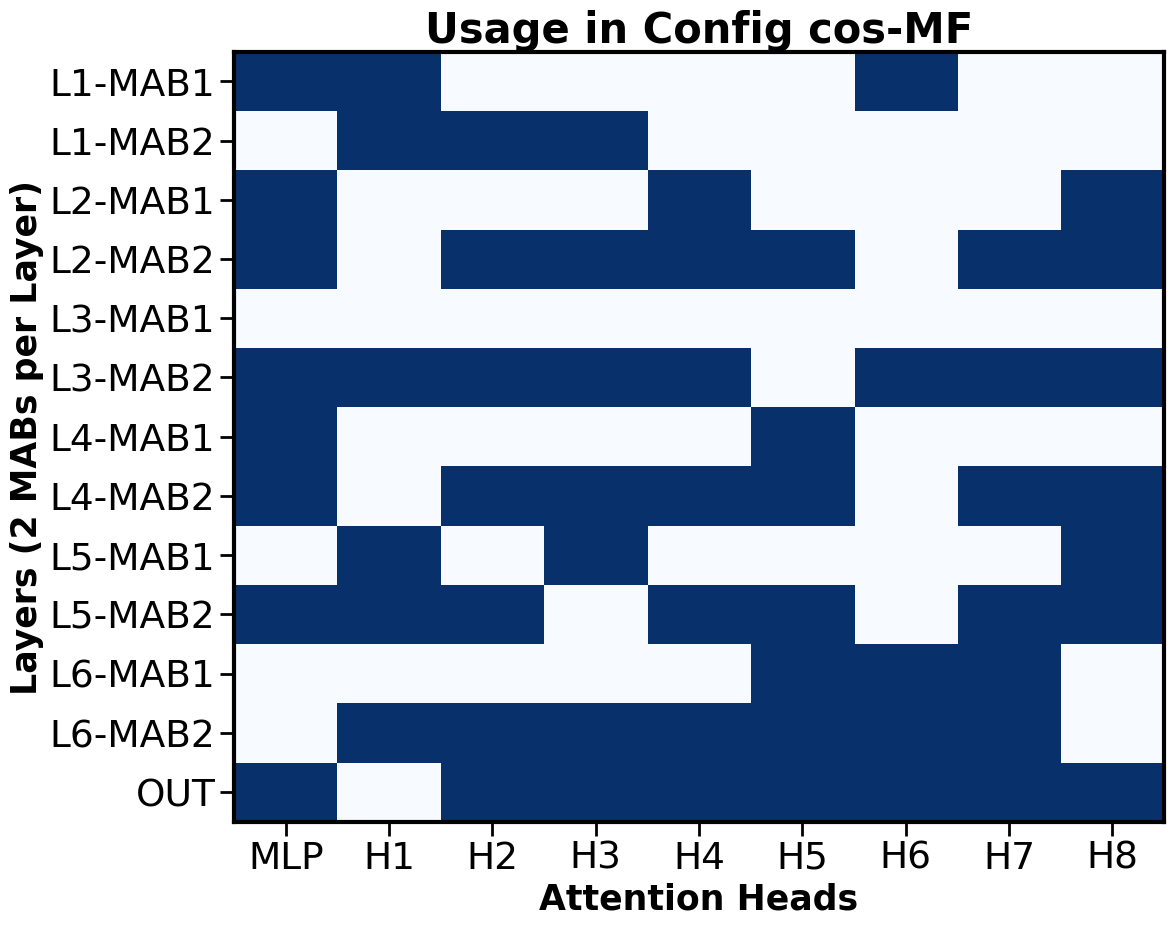

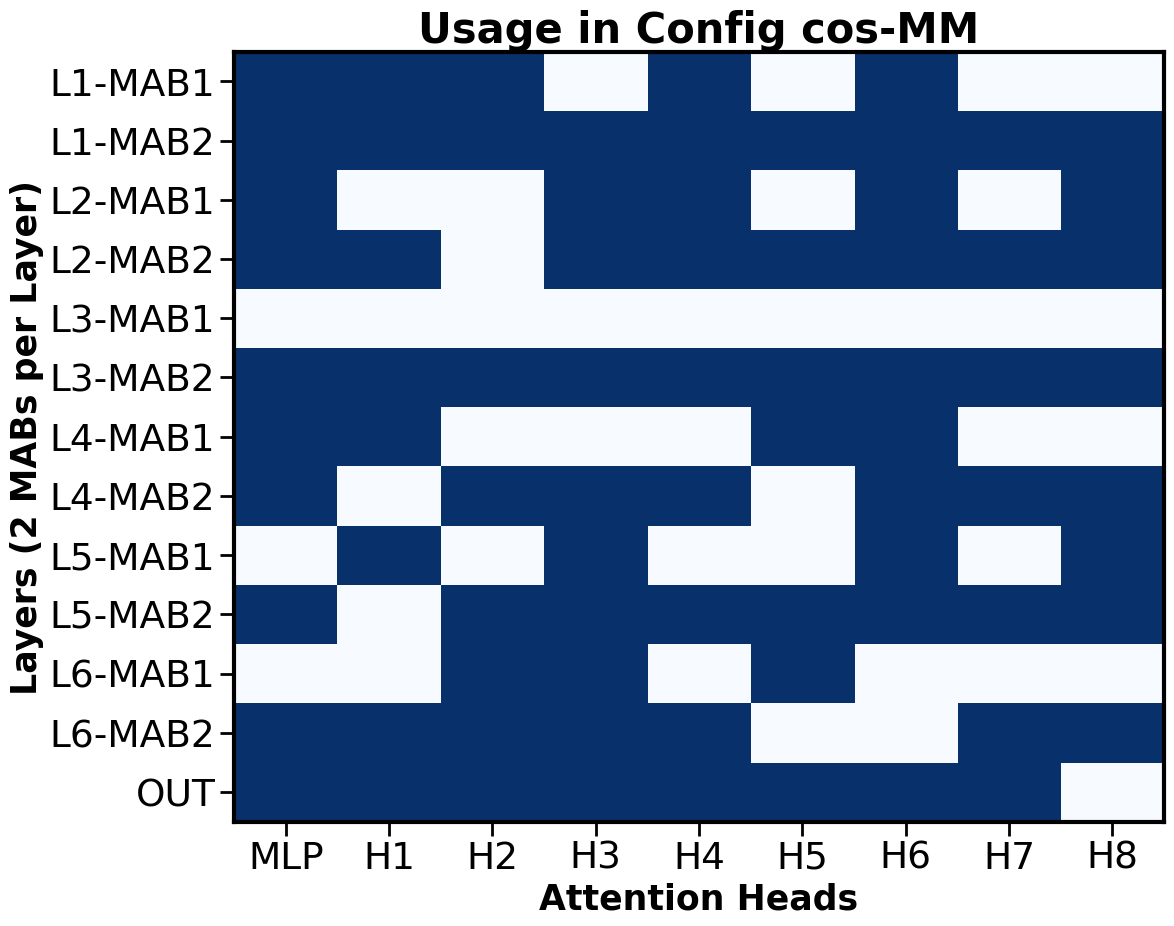

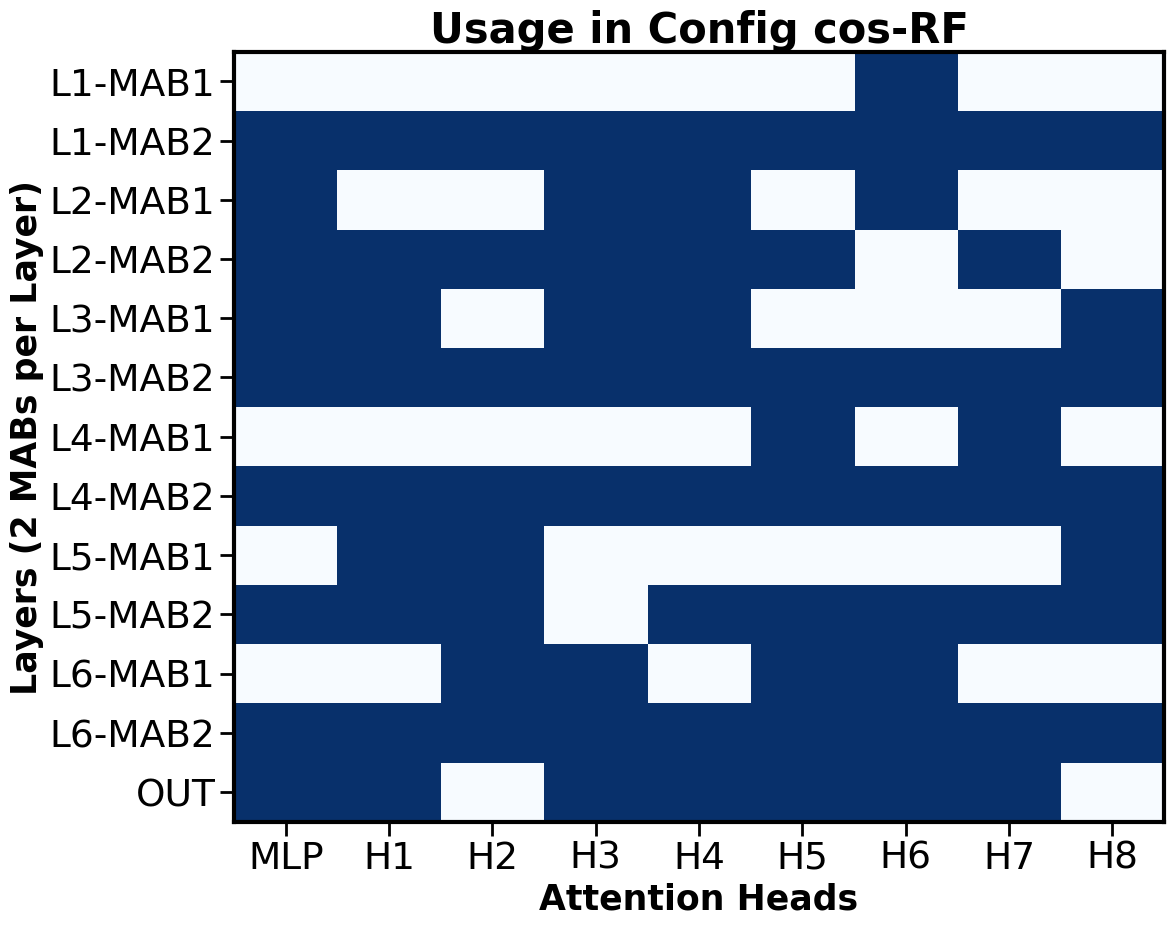

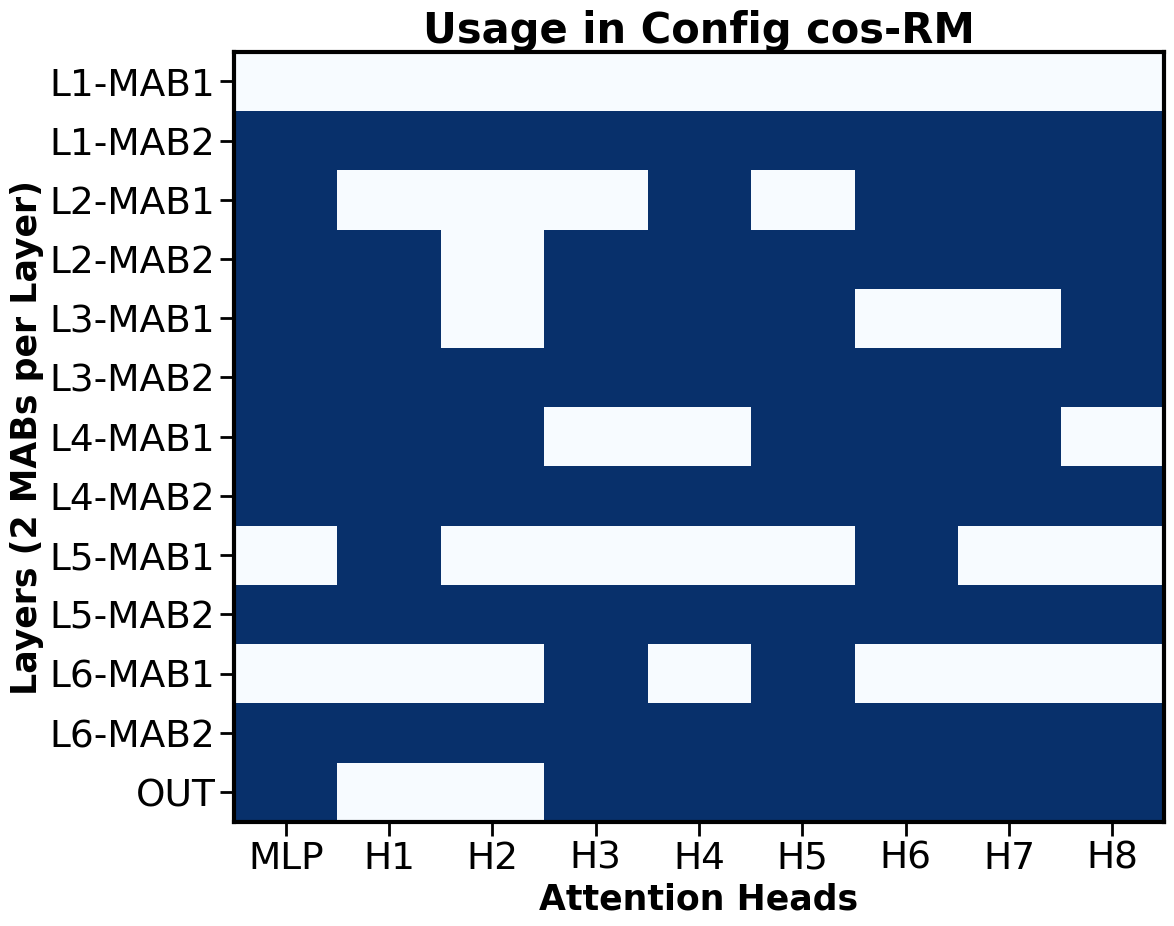

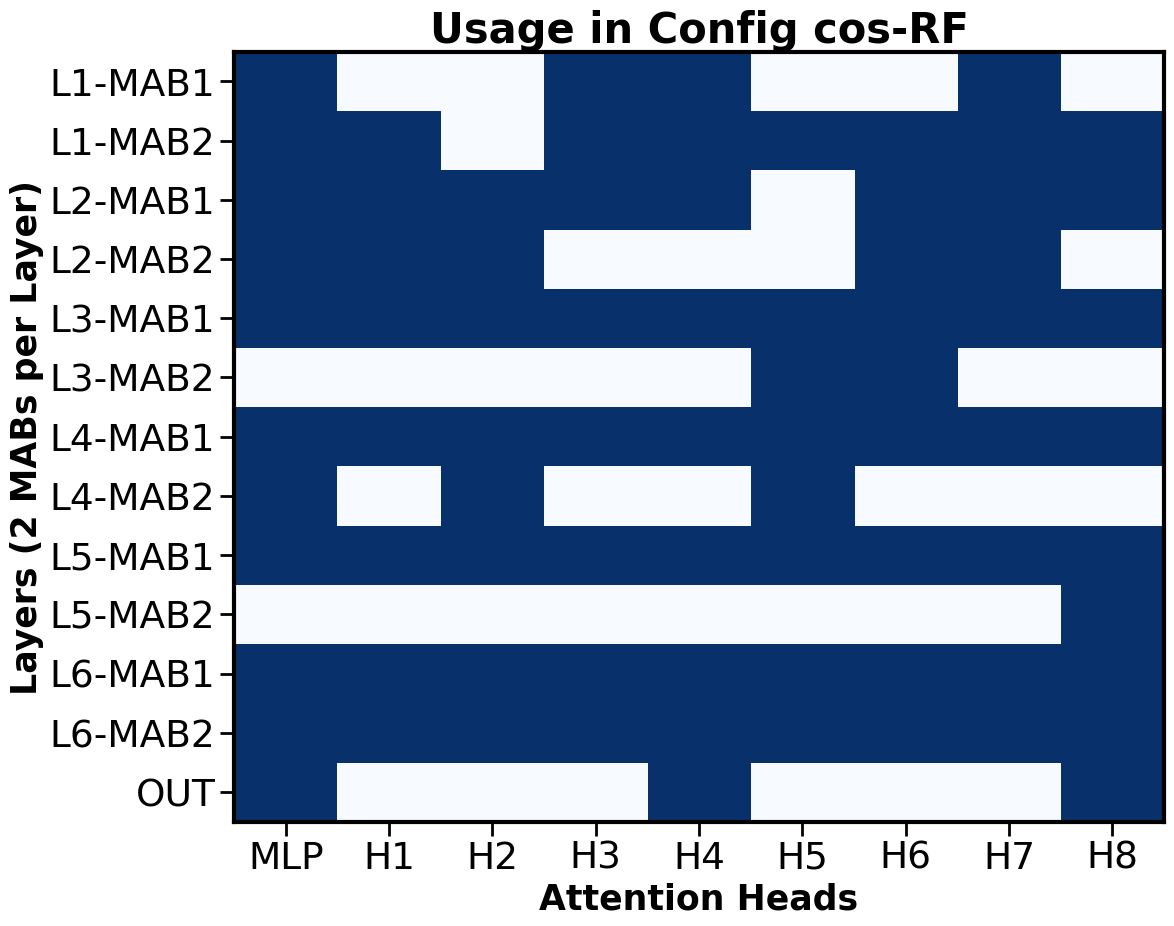

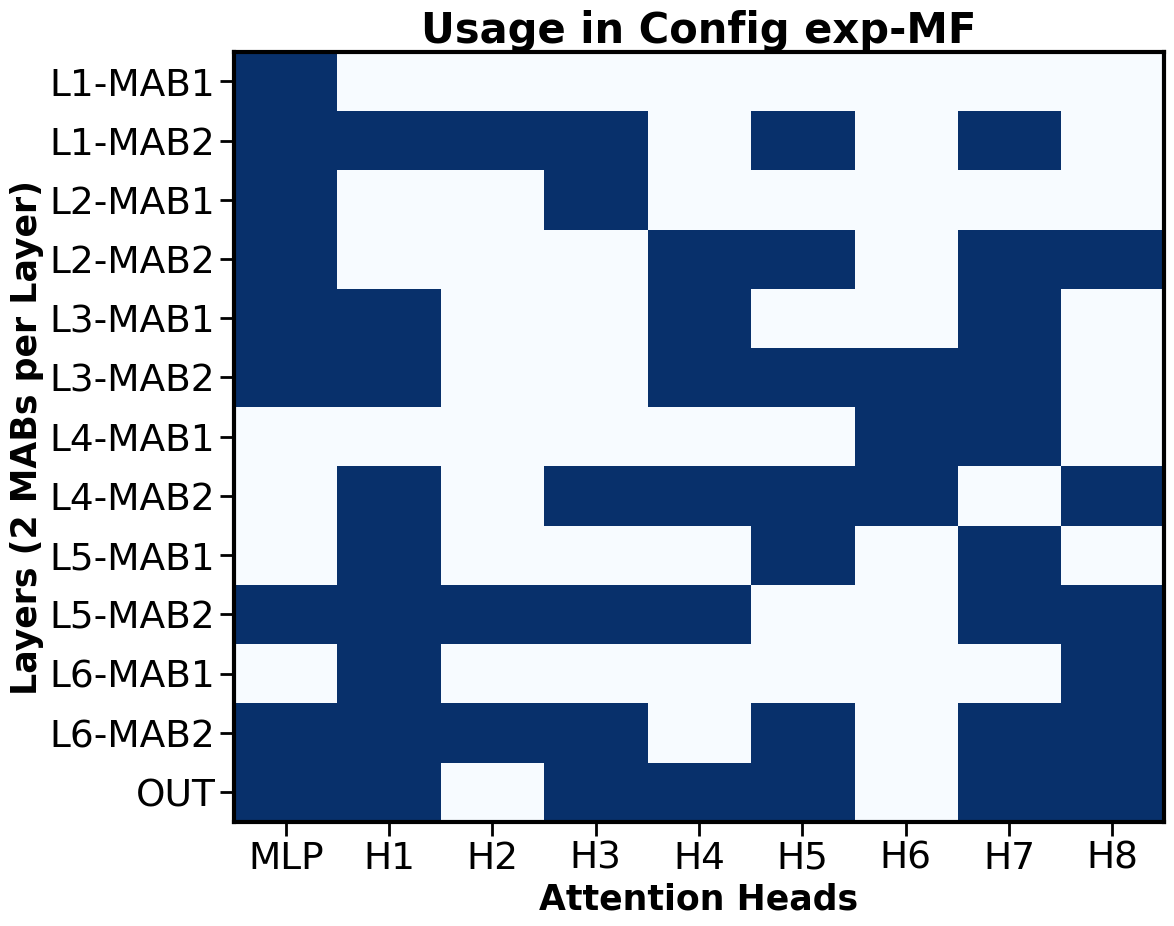

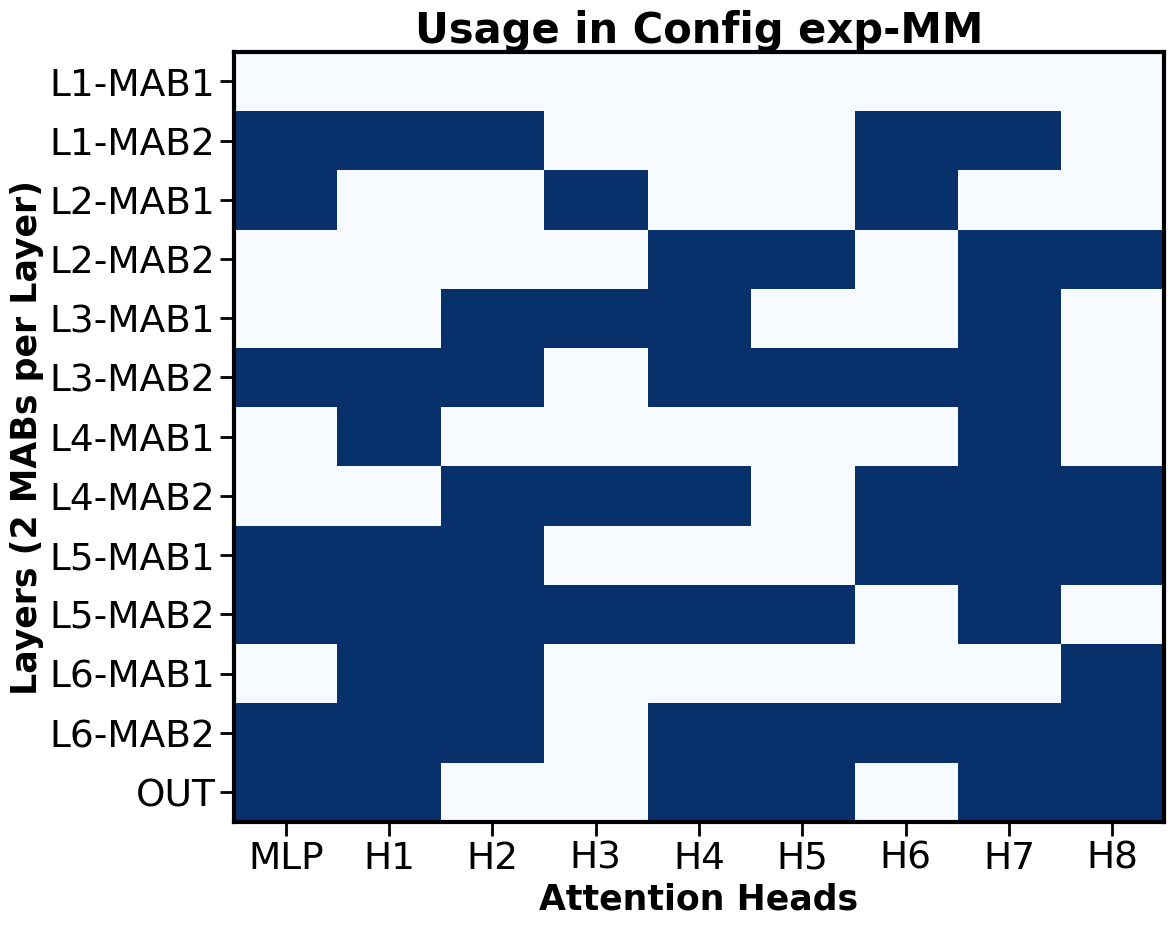

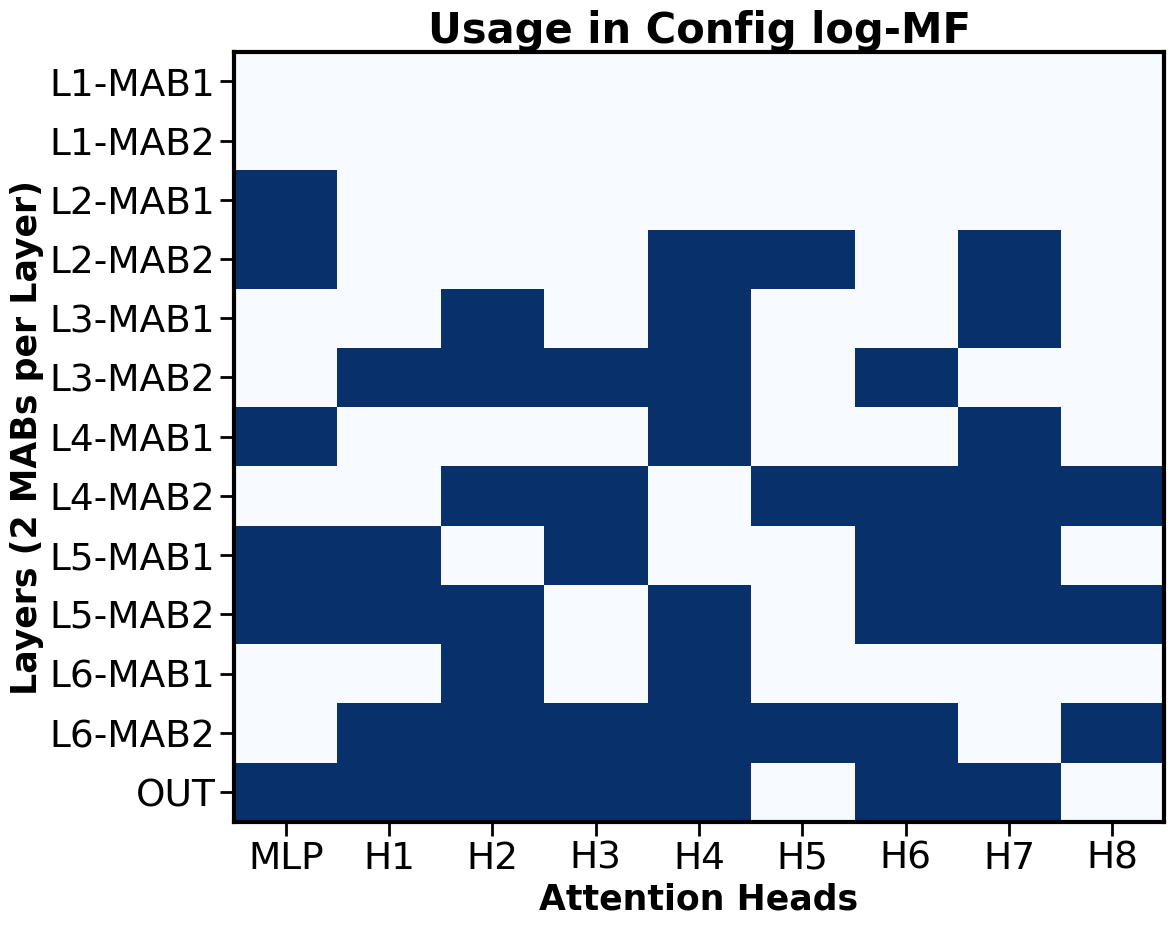

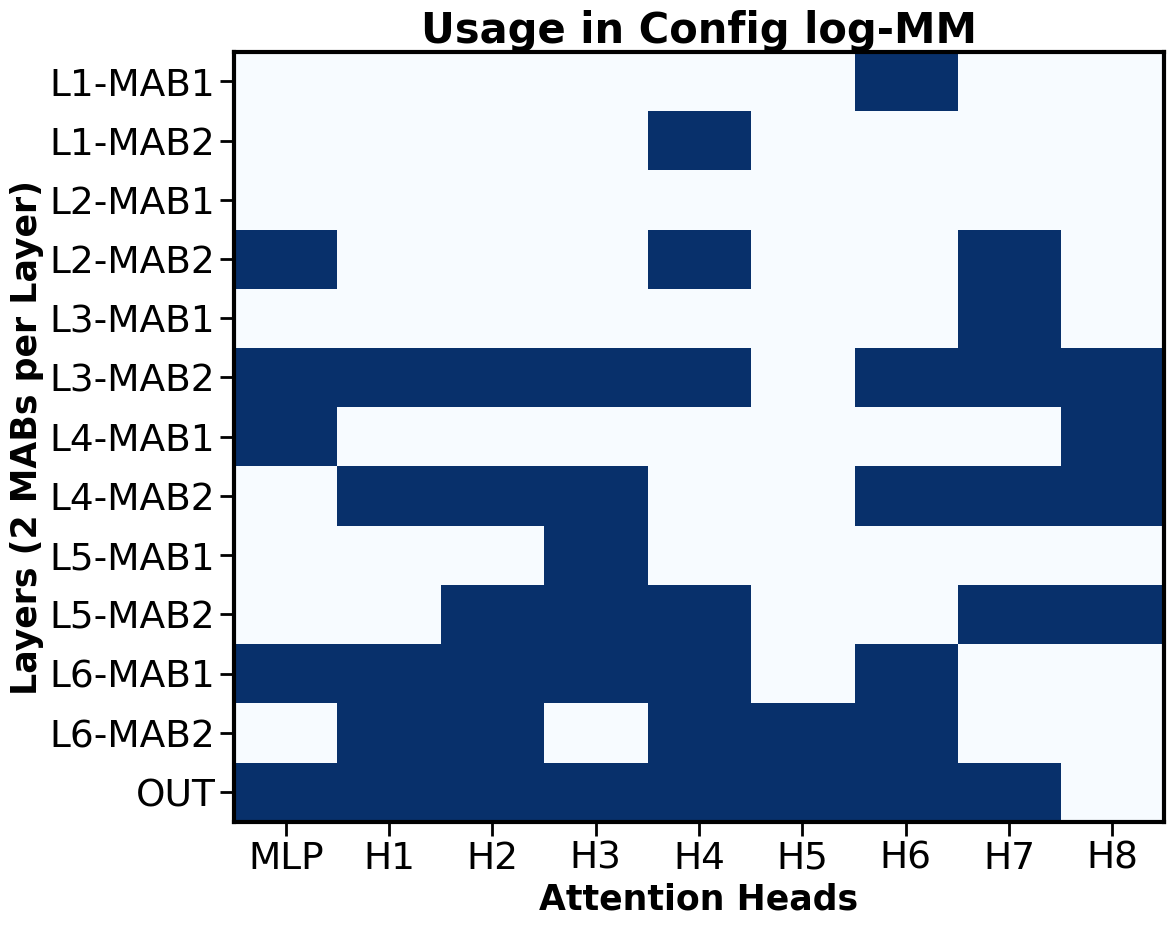

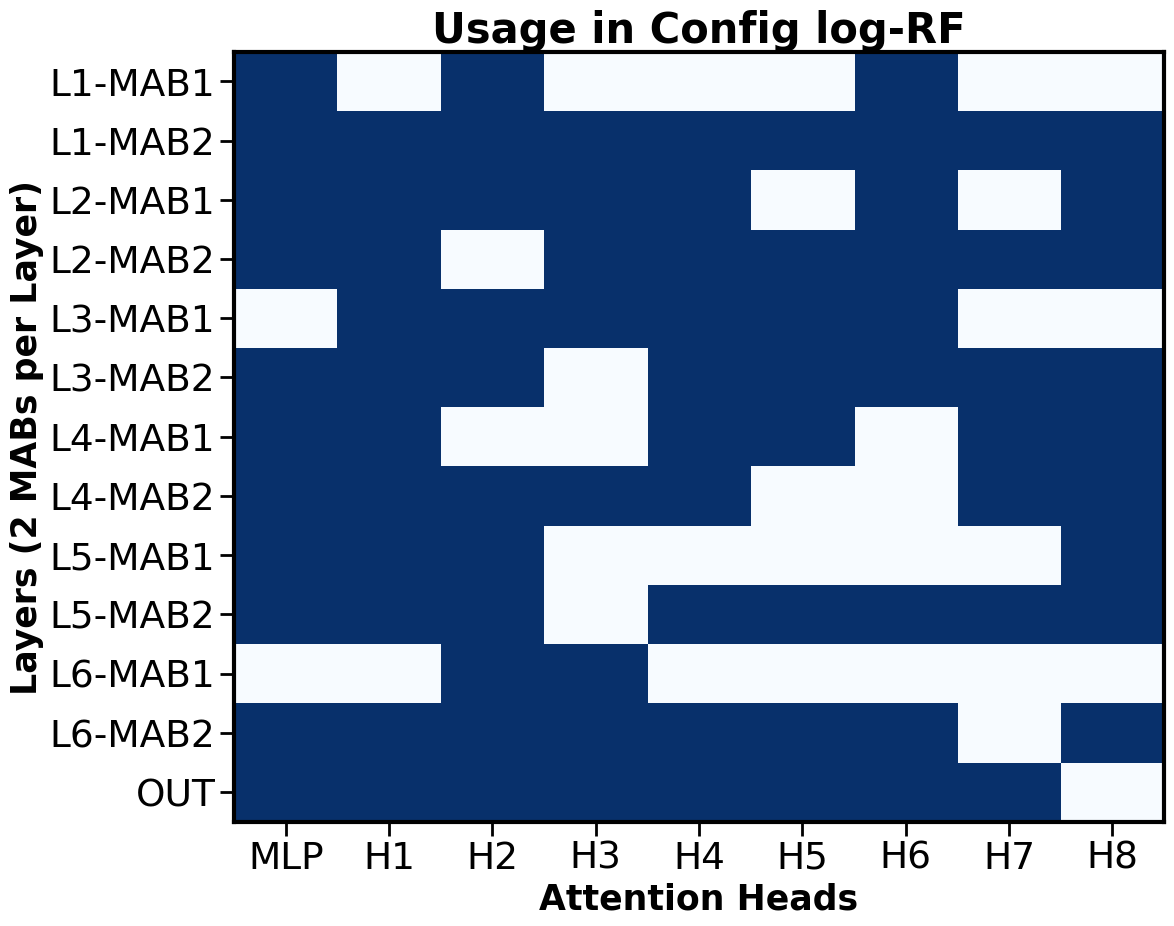

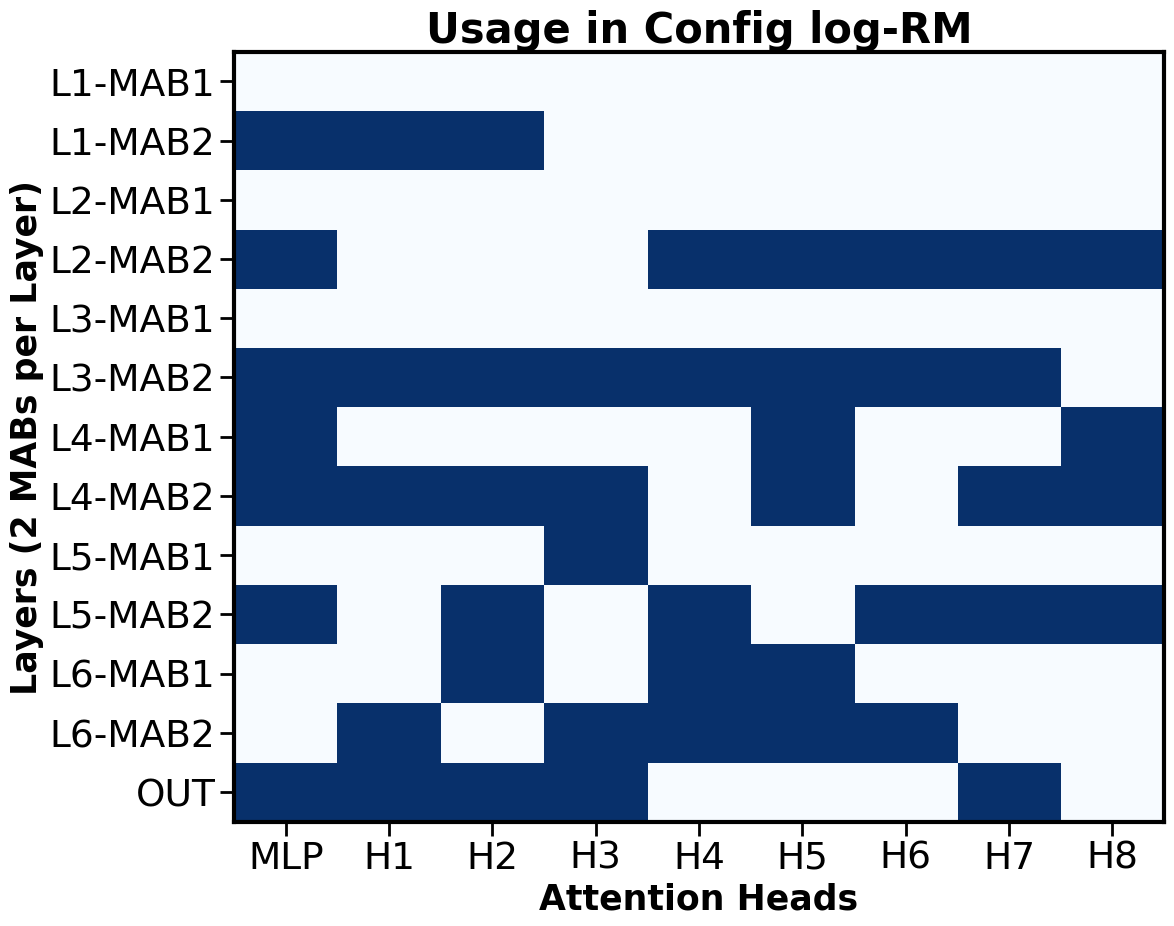

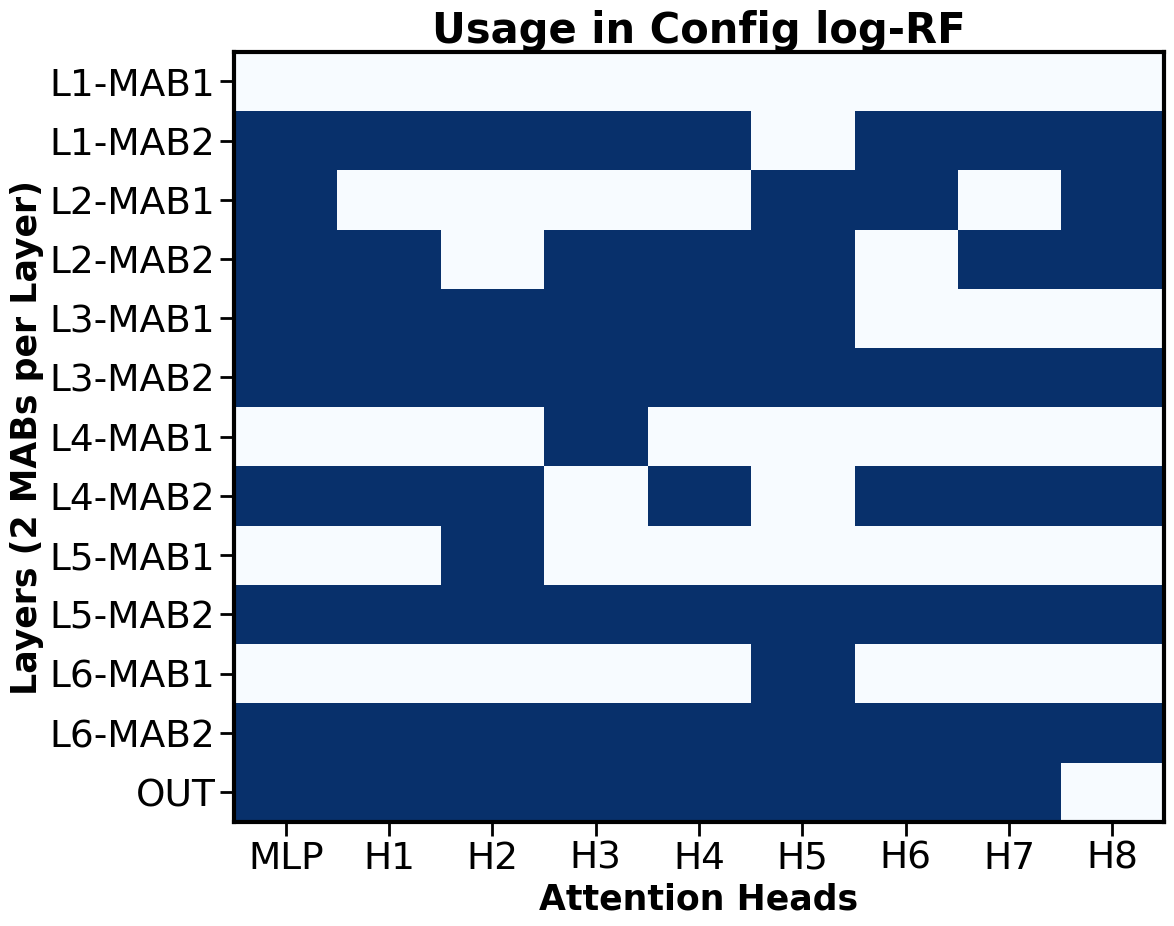

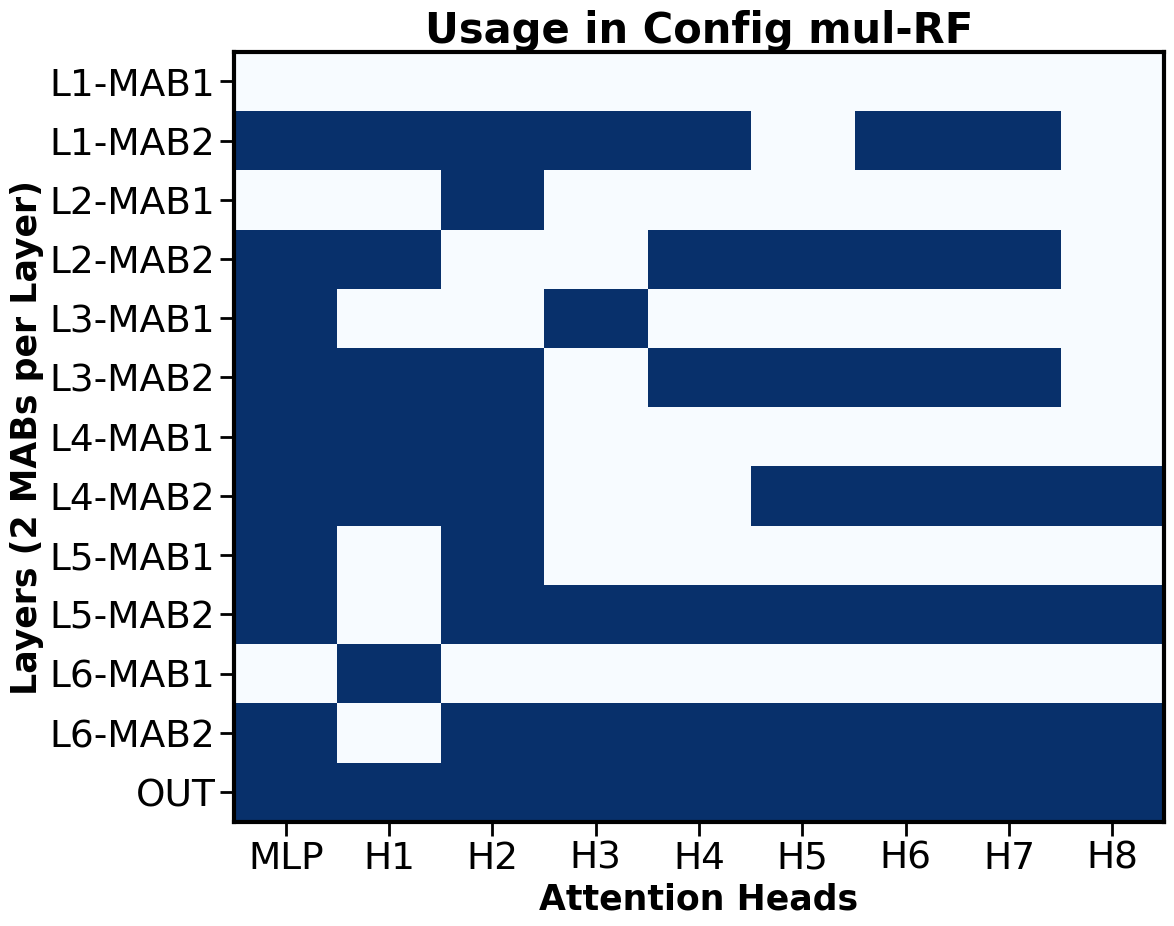

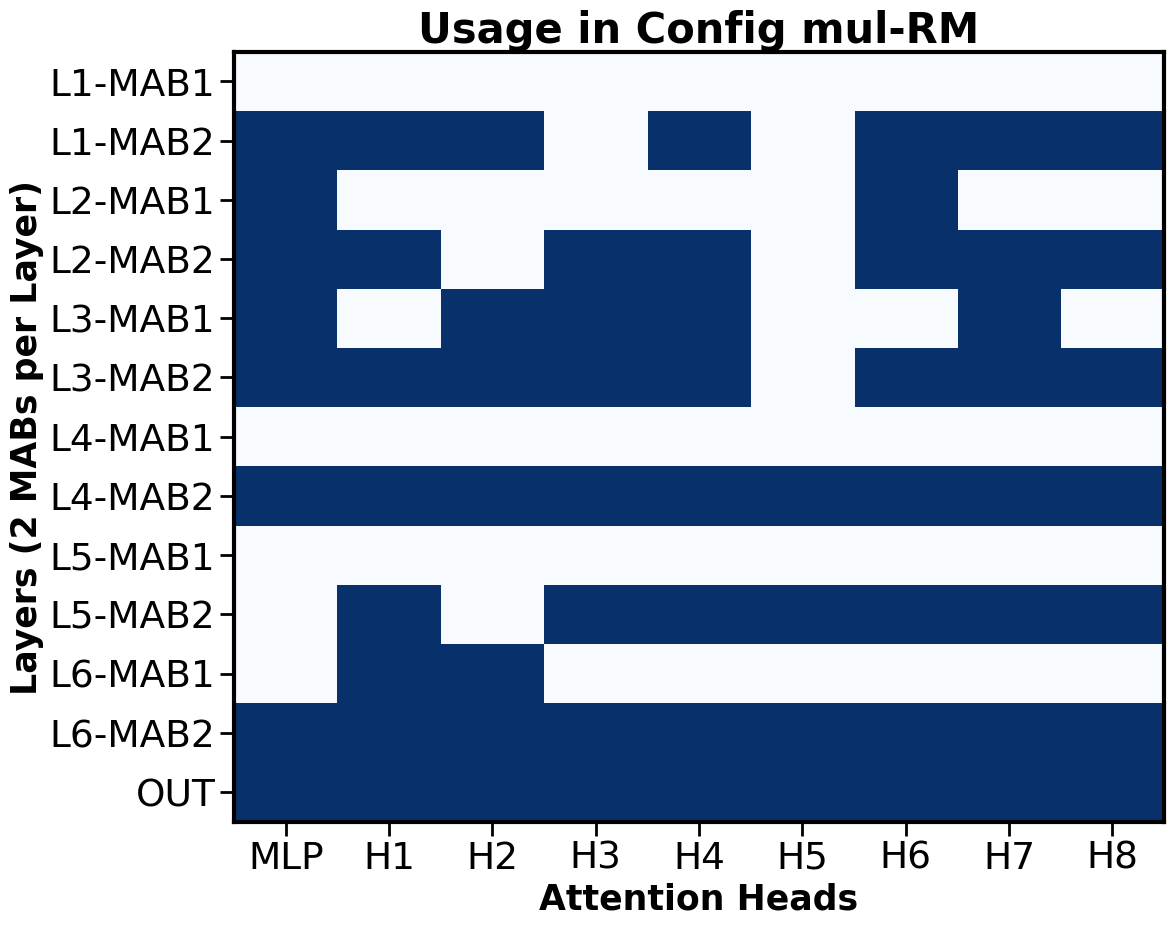

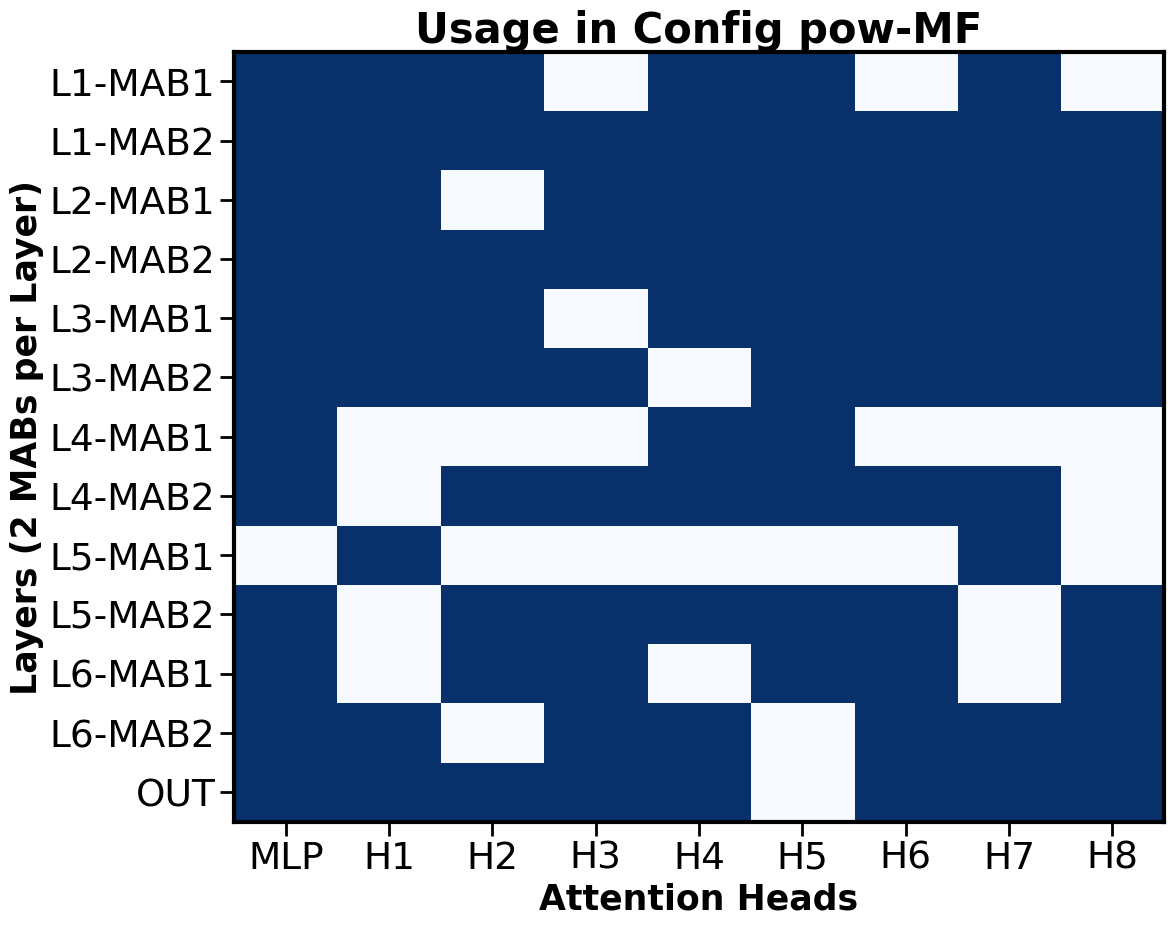

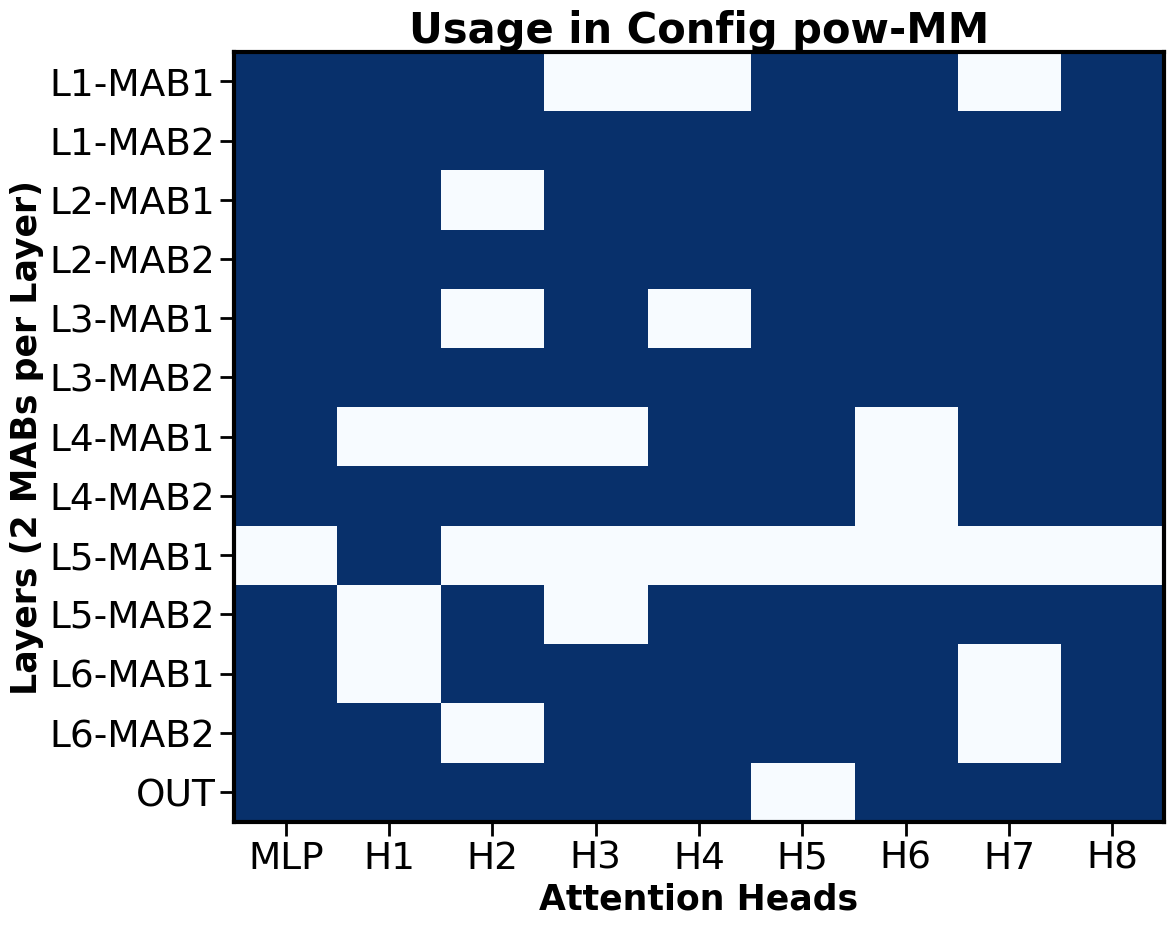

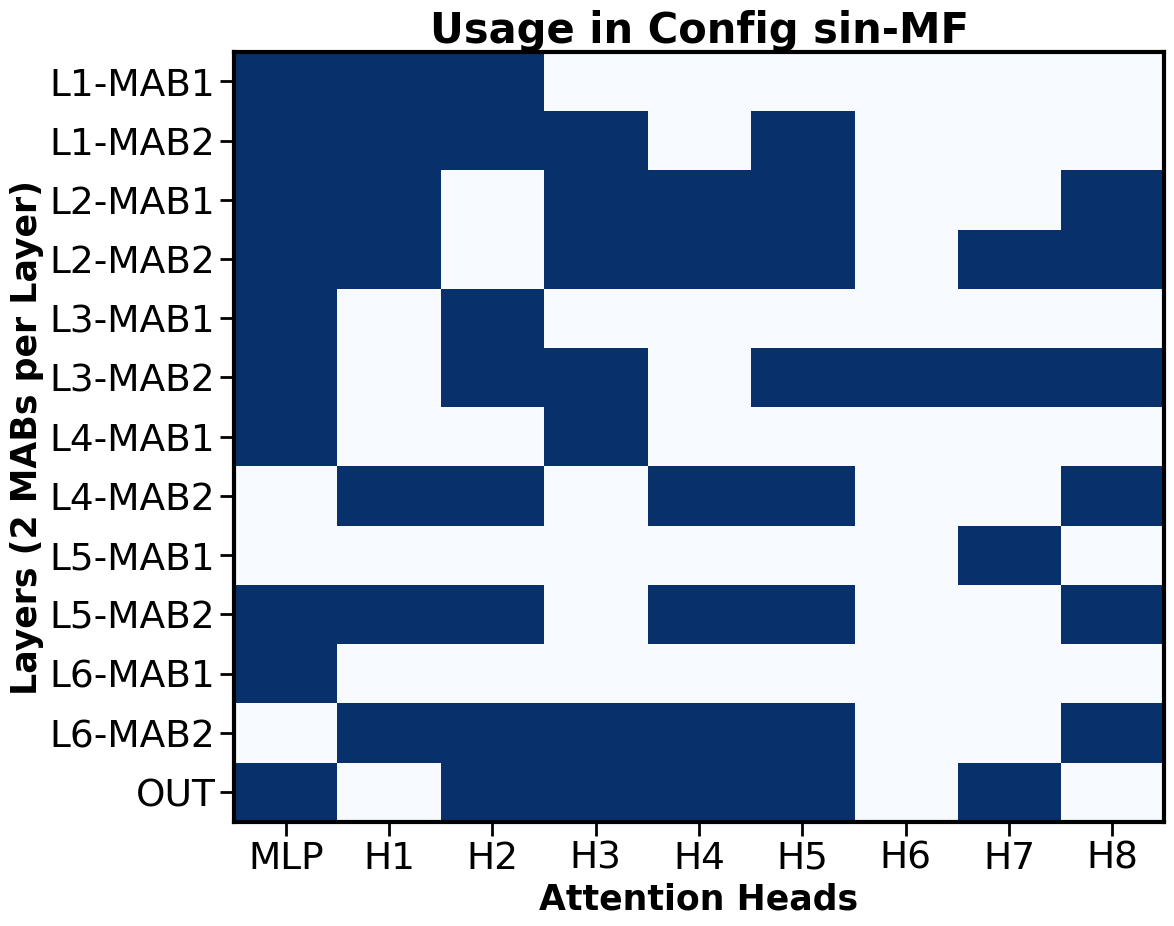

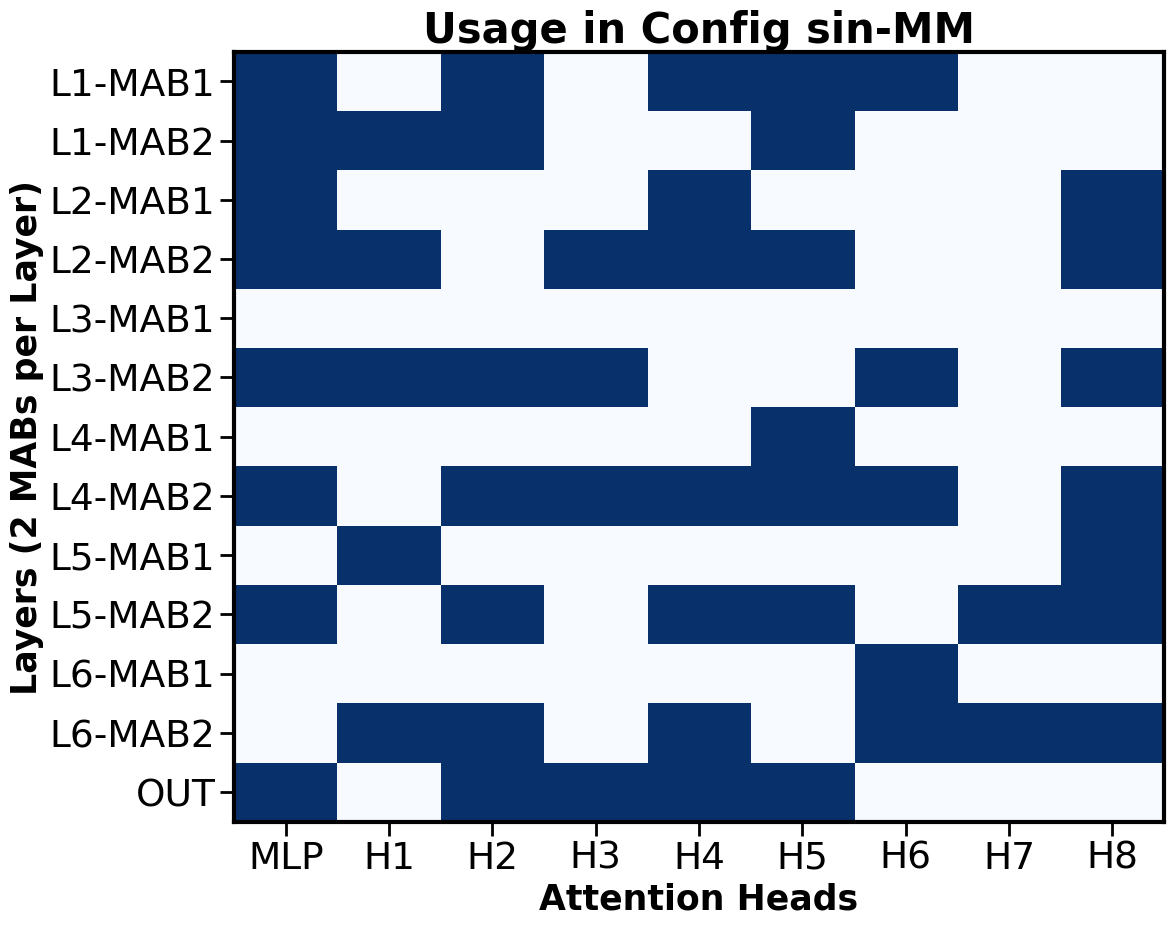

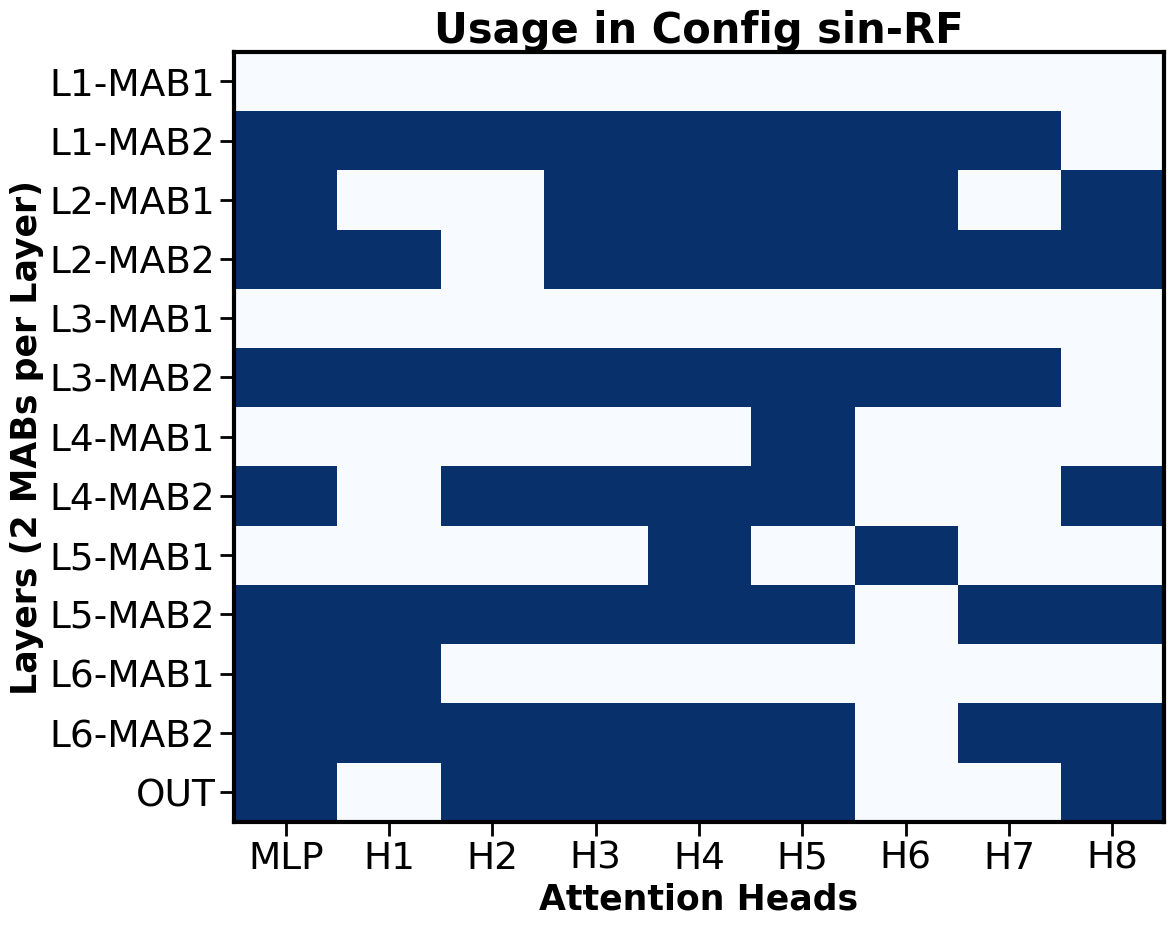

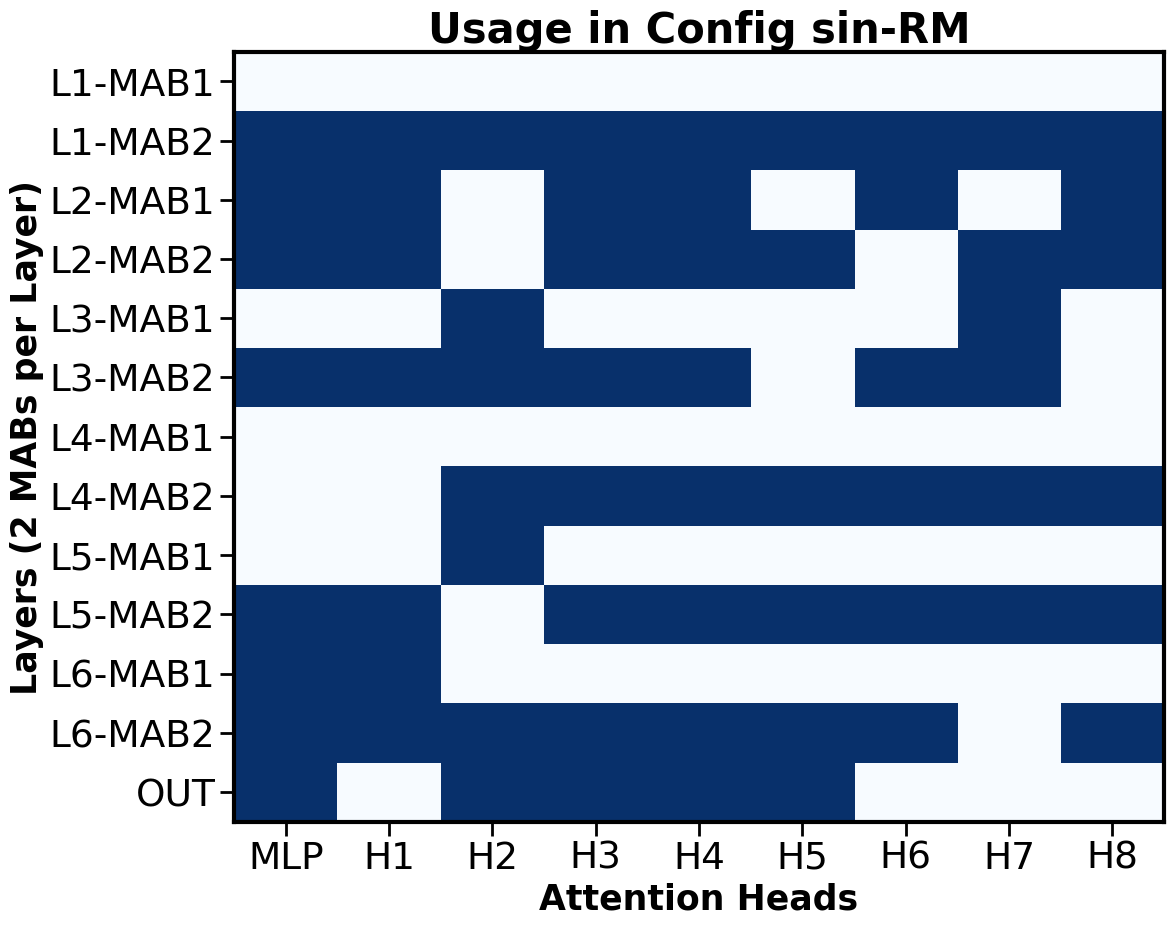

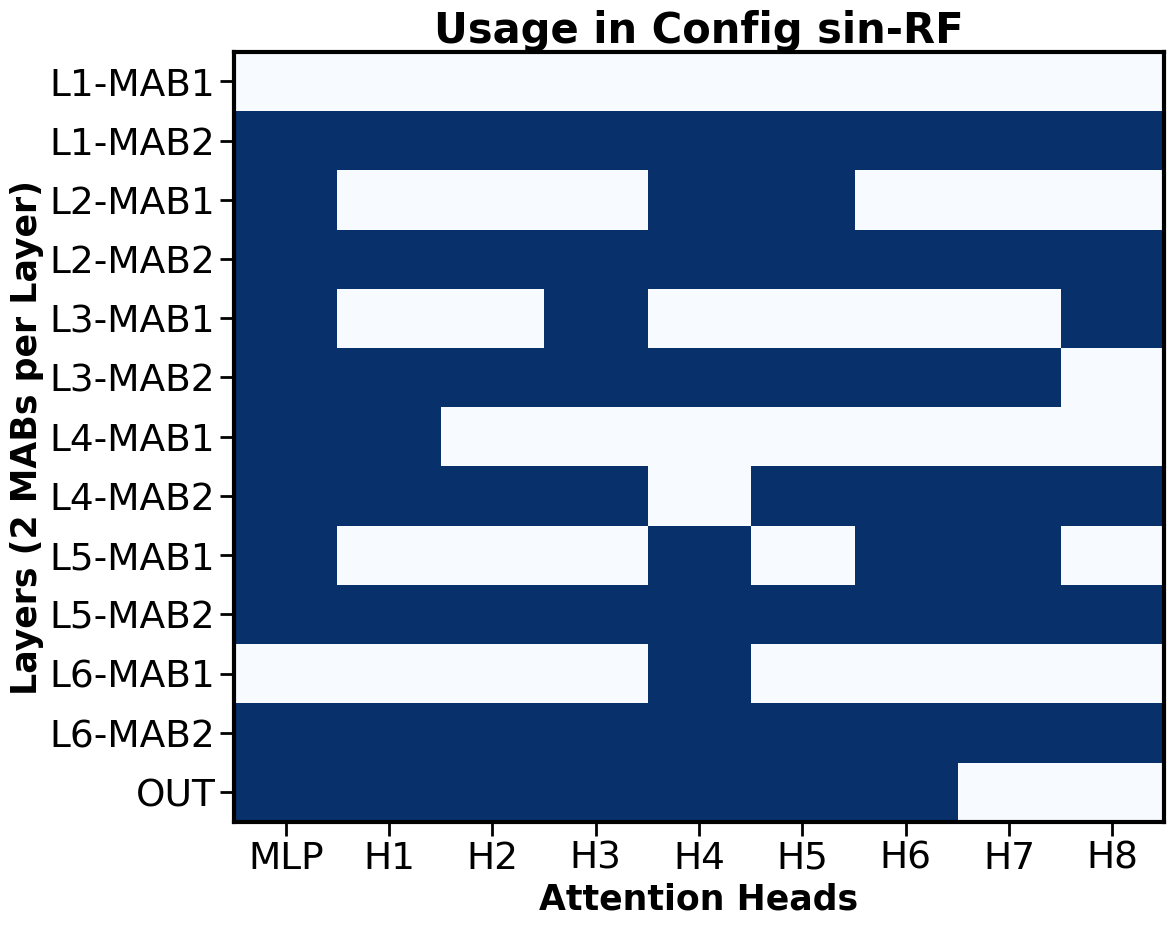

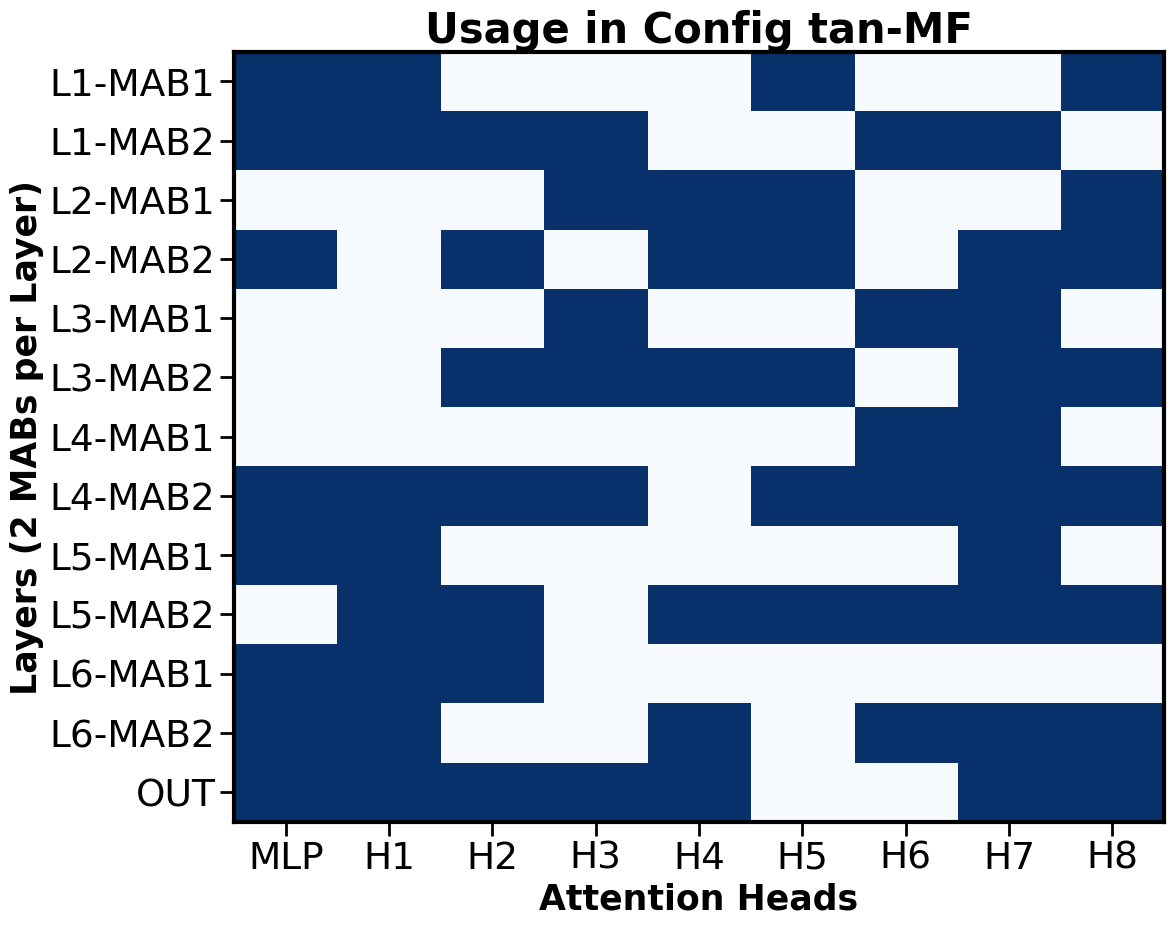

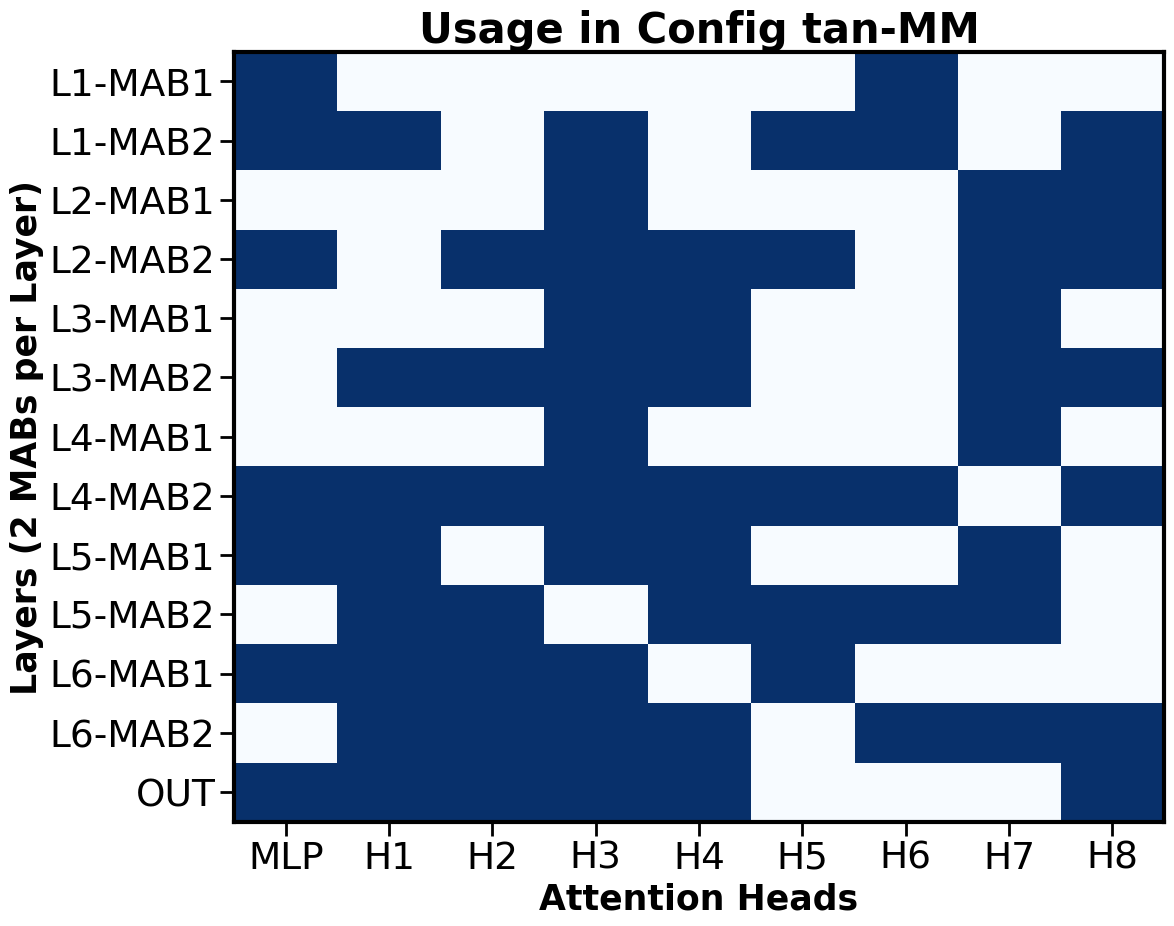

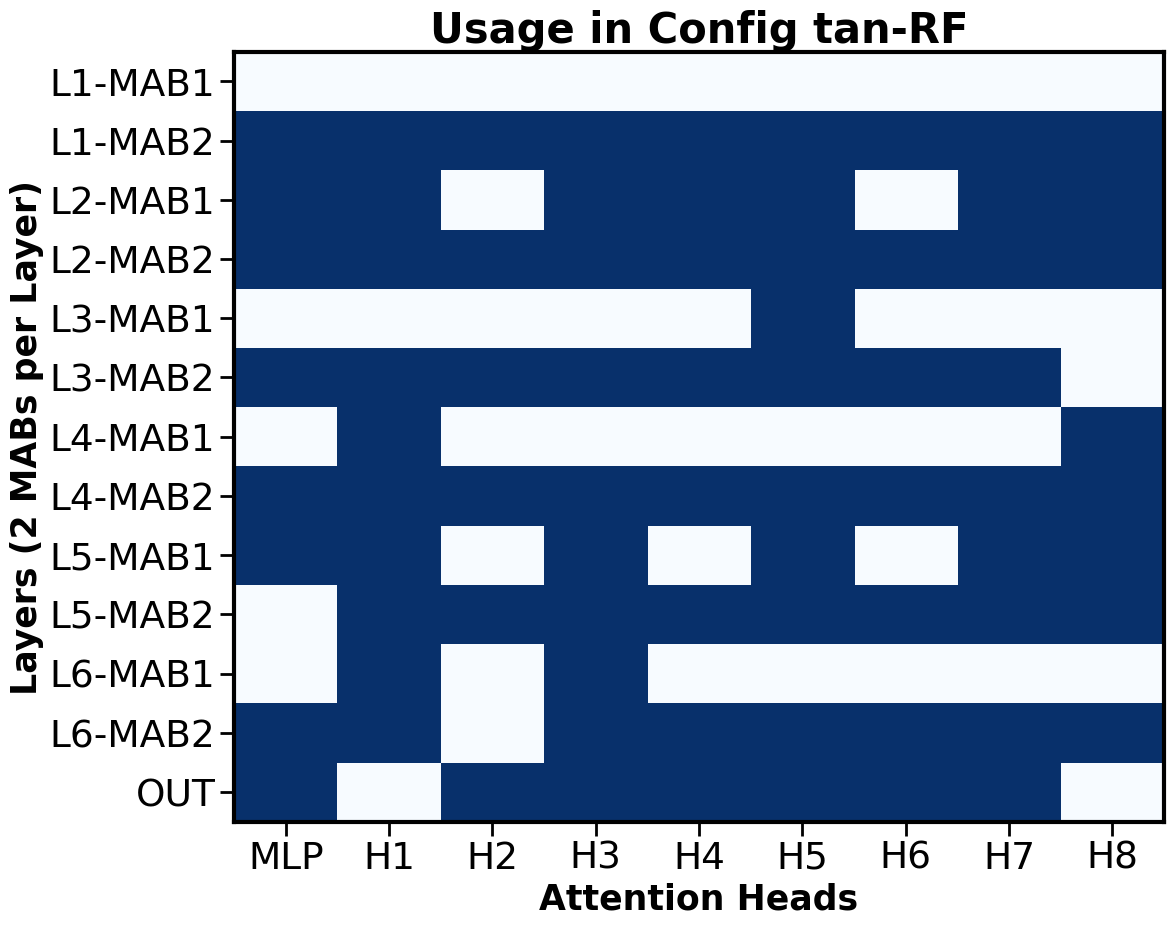

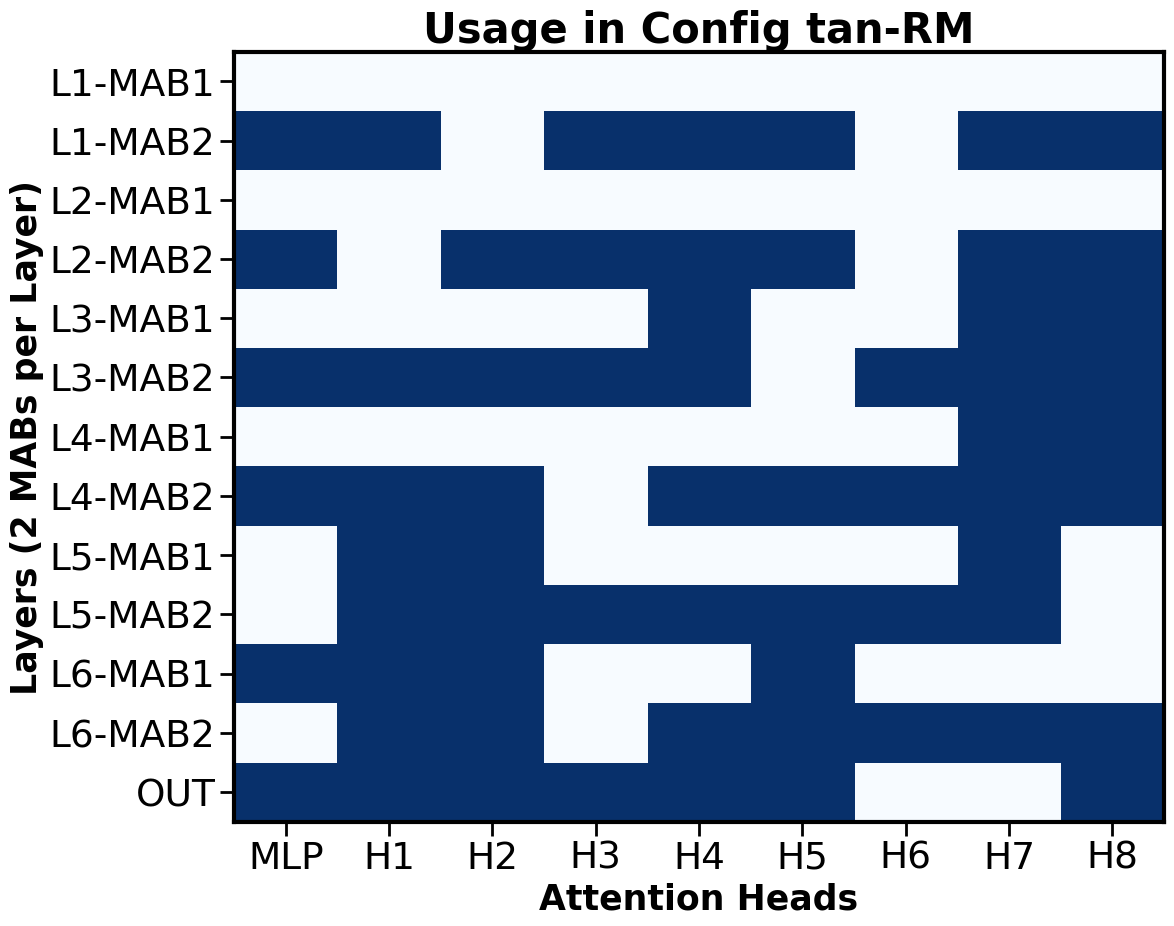

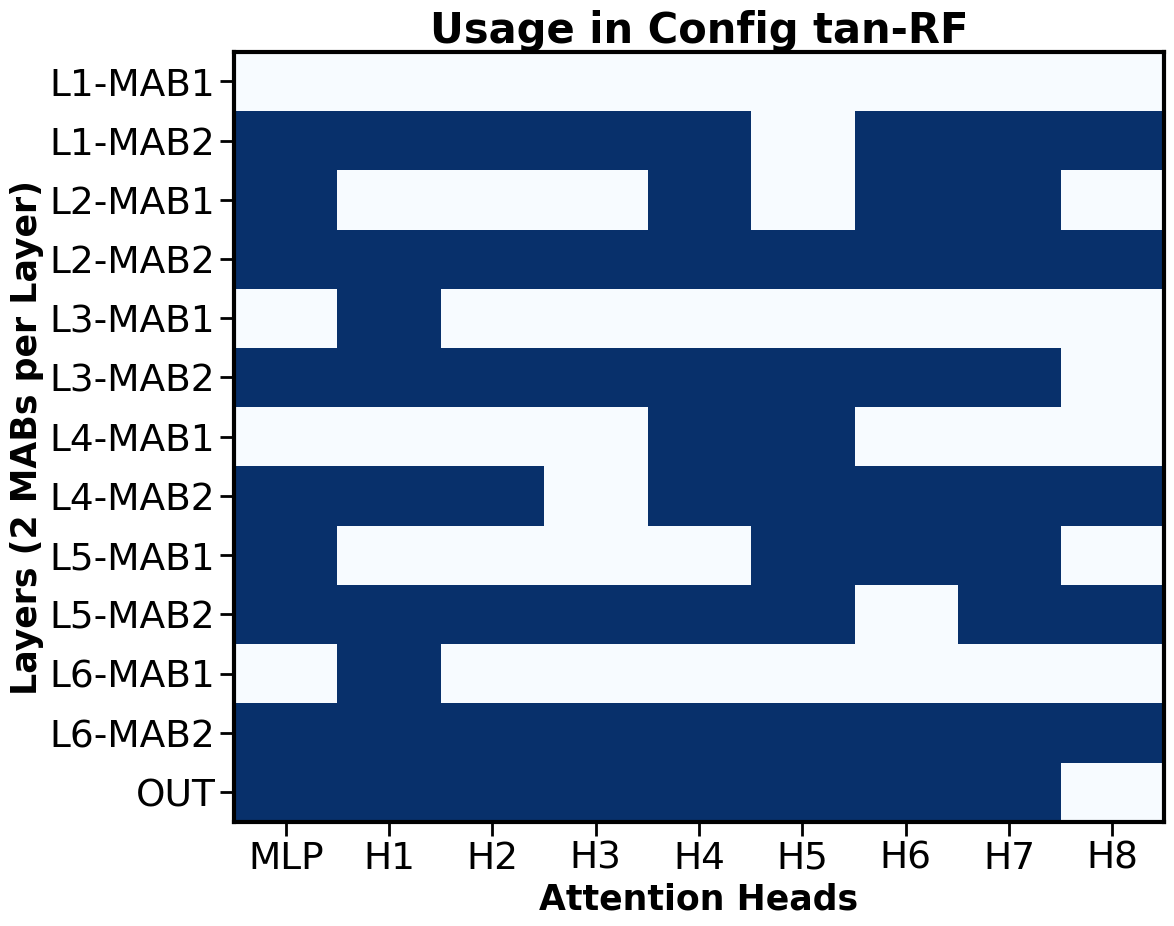

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from vis_utils import importance_map 
    # Plotn_type"].capitalize()[0]}'


    counter = Counter(circuit)
    full_count = [counter.get(i, 0) for i in all_possible]
    count_matrix = np.array(full_count).reshape(shape)


    bliep = count_matrix[2, :]
    count_matrix = np.delete(count_matrix, 2, axis=0)
    count_matrix = np.vstack((count_matrix, bliep))


    importance_map(
        data=count_matrix,
        threshold=20,
        title=f"Usage in {name}",
        save_fig=True,
        show_threshold=False,
        save_path=f"pictures/circuitfinding/per_config/{name}",
        show_border=False,
        color_way = False
    )
